## Investment Analysis Assignment
###### By : M.Phaneeshwar

#### Spark Funds has two minor Constraints for invesments:

1) It wants to invest between 5 to 15 million USD per round investment
2) It wants to invest only in english speaking countries
3) It wants to invest where most other investors are investing

* Business objective : is to identify 
1) best sectors
2) best countries
3) Investment type

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Checkpoint 1

#### Reading Input .csv Files 

In [2]:
rounds2 = pd.read_csv('C:/Users/Eeshwar/Desktop/deep learning/Data Visualization_Case+Study+Notebook/Case Study Notebook/rounds2.csv',encoding= 'unicode_escape') #'unicode_escape'
mappings = pd.read_csv('C:/Users/Eeshwar/Desktop/deep learning/Data Visualization_Case+Study+Notebook/Case Study Notebook/mapping.csv')
companies = pd.read_csv('C:/Users/Eeshwar/Desktop/deep learning/Data Visualization_Case+Study+Notebook/Case Study Notebook/companies.csv',encoding= 'unicode_escape') 

In [3]:
len(rounds2.company_permalink.str.upper().unique())

66370

In [4]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [5]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [6]:
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [7]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [8]:
companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/ÃAsys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [9]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

#### How many unique companies are present in rounds2?

In [10]:
rounds2.company_permalink = rounds2.company_permalink.str.lower()

In [11]:
len(rounds2.company_permalink.unique())

66370

#### How many unique companies are present in companies?

In [12]:
companies.permalink = companies.permalink.str.lower()

In [13]:
len(companies.permalink.unique())

66368

In [14]:
rounds2[rounds2.company_permalink.isin(companies.permalink)]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/ãasys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


#### Merging two data frames To Create a Master Frame




In [15]:
master_frame=pd.merge(rounds2,companies,how="left",left_on="company_permalink",right_on="permalink")

## Data Cleaning

In [16]:
print(master_frame.isnull().sum())
print(master_frame.shape)

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      7
name                           8
homepage_url                6139
category_list               3414
status                         7
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20527
dtype: int64
(114949, 16)


In [17]:
round(100 * master_frame.isnull().sum() / len(master_frame),2) 

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.01
name                        0.01
homepage_url                5.34
category_list               2.97
status                      0.01
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.86
dtype: float64

In [18]:
master_frame.drop('funding_round_code',inplace = True, axis = 1)

In [19]:
master_frame.drop('founded_at', inplace = True, axis = 1)

In [20]:
master_frame.drop('homepage_url',inplace = True, axis = 1)

In [21]:
master_frame.drop('state_code',inplace = True, axis = 1)

In [22]:
master_frame.drop('region',inplace = True, axis = 1)

##### We will not replace the null values in rasied amount usd because the values depends on country, Investment type, Hence these values are deleted

In [23]:
master_frame = master_frame[~master_frame.raised_amount_usd.isnull()]

In [24]:
master_frame.status.value_counts()

operating    73728
acquired     10114
closed        7055
ipo           4061
Name: status, dtype: int64

#### Remove all the companies which are closed, because if majority of companies of a particular sector are closed then there is no point of investing in such sectors

In [25]:
master_frame = master_frame[~(master_frame.status == 'closed')]

In [26]:
master_frame = master_frame[~master_frame.country_code.isnull()]

In [27]:
master_frame.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,Mumbai
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,Delaware City
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,Beijing
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0,/organization/01games-technology,01Games Technology,Games,operating,HKG,Hong Kong
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,Vancouver
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,Vancouver
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,22-05-2013,3000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,Mountain View
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,Mountain View
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,Mountain View
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,Mountain View


In [28]:
print(master_frame.isnull().sum())
print(master_frame.shape)

company_permalink             0
funding_round_permalink       0
funding_round_type            0
funded_at                     0
raised_amount_usd             0
permalink                     0
name                          0
category_list               431
status                        0
country_code                  0
city                       1088
dtype: int64
(83277, 11)


In [29]:
round(100 * master_frame.isnull().sum() / len(master_frame),2) 

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
category_list              0.52
status                     0.00
country_code               0.00
city                       1.31
dtype: float64

In [30]:
master_frame.shape
master_frame.country_code.value_counts()[0:9]

USA    58011
GBR     4708
CAN     2410
CHN     1869
IND     1590
FRA     1352
ISR     1276
ESP     1015
DEU      980
Name: country_code, dtype: int64

## Checkpoint 2: Funding Type Analysis

### The Four Investment Types seed, angel, venture, private_equity

In [31]:
master_frame.funding_round_type.value_counts()

venture                  44949
seed                     19844
debt_financing            6126
angel                     3982
grant                     1862
private_equity            1731
undisclosed               1292
convertible_note          1275
equity_crowdfunding       1126
post_ipo_equity            547
product_crowdfunding       321
post_ipo_debt              138
non_equity_assistance       59
secondary_market            25
Name: funding_round_type, dtype: int64

In [32]:
fund_mean = pd.DataFrame(master_frame.groupby(['funding_round_type'])['raised_amount_usd'].mean().sort_values(ascending = False).reset_index(level = 0))
fund_mean

,funding_round_type,raised_amount_usd
0,post_ipo_debt,1.754697e+08
1,secondary_market,9.408940e+07
2,private_equity,7.579720e+07
3,post_ipo_equity,6.709361e+07
4,debt_financing,1.789101e+07
5,undisclosed,1.601821e+07
6,venture,1.190315e+07
7,grant,4.286180e+06
8,product_crowdfunding,1.521050e+06
9,convertible_note,1.340013e+06


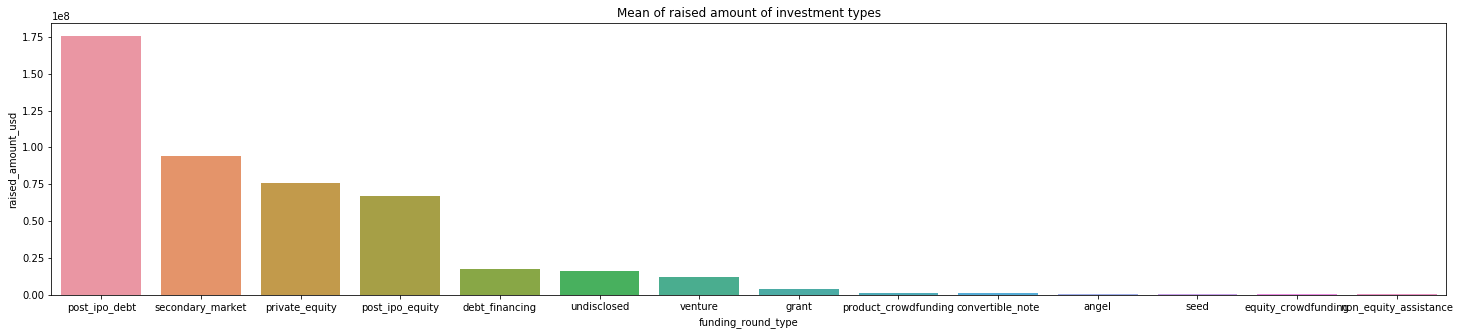

In [33]:
plt.subplots(figsize = (25,5))
sns.barplot(fund_mean.funding_round_type,fund_mean.raised_amount_usd)
plt.title('Mean of raised amount of investment types')
plt.show()

In [34]:
fund_sum = pd.DataFrame(master_frame.groupby(['funding_round_type'])['raised_amount_usd'].sum().sort_values(ascending = False).reset_index(level = 0))
fund_sum

,funding_round_type,raised_amount_usd
0,venture,5.350348e+11
1,private_equity,1.312050e+11
2,debt_financing,1.096003e+11
3,post_ipo_equity,3.670021e+10
4,post_ipo_debt,2.421482e+10
5,undisclosed,2.069553e+10
6,seed,1.514290e+10
7,grant,7.980868e+09
8,angel,3.961115e+09
9,secondary_market,2.352235e+09


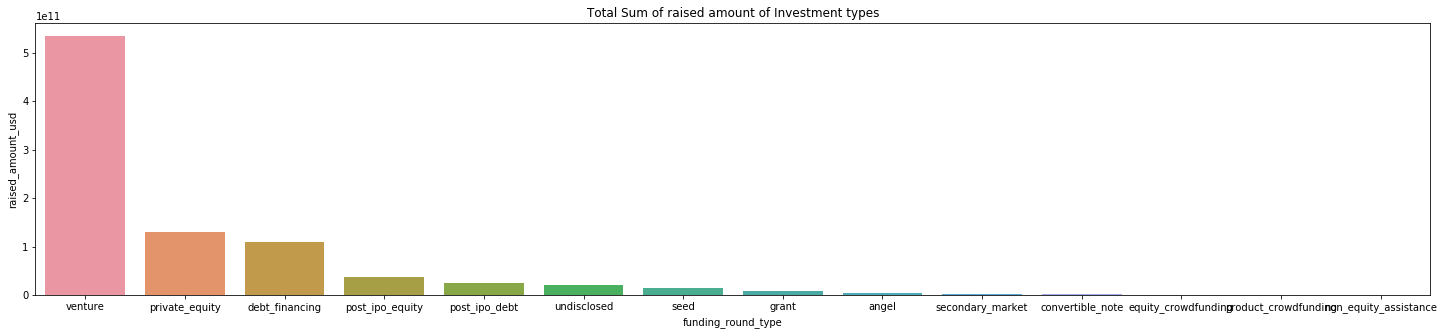

In [35]:
plt.subplots(figsize = (25,5))
sns.barplot(fund_sum.funding_round_type,fund_sum.raised_amount_usd)
plt.title('Total Sum of raised amount of Investment types')
plt.show()

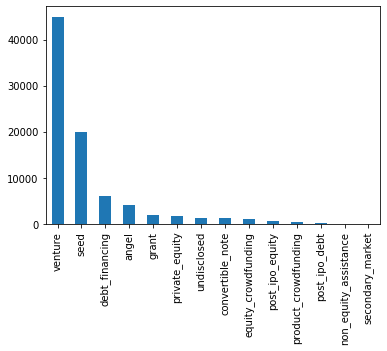

In [36]:
master_frame.funding_round_type.value_counts().plot(kind = 'bar')
plt.show()

In [37]:
fund_count = pd.DataFrame(master_frame.funding_round_type.value_counts().reset_index(level = 0))
fund_count = fund_count.rename(columns={'index':'funding_round_type', 'funding_round_type':'total_count'})
fund_count

,funding_round_type,total_count
0,venture,44949
1,seed,19844
2,debt_financing,6126
3,angel,3982
4,grant,1862
5,private_equity,1731
6,undisclosed,1292
7,convertible_note,1275
8,equity_crowdfunding,1126
9,post_ipo_equity,547


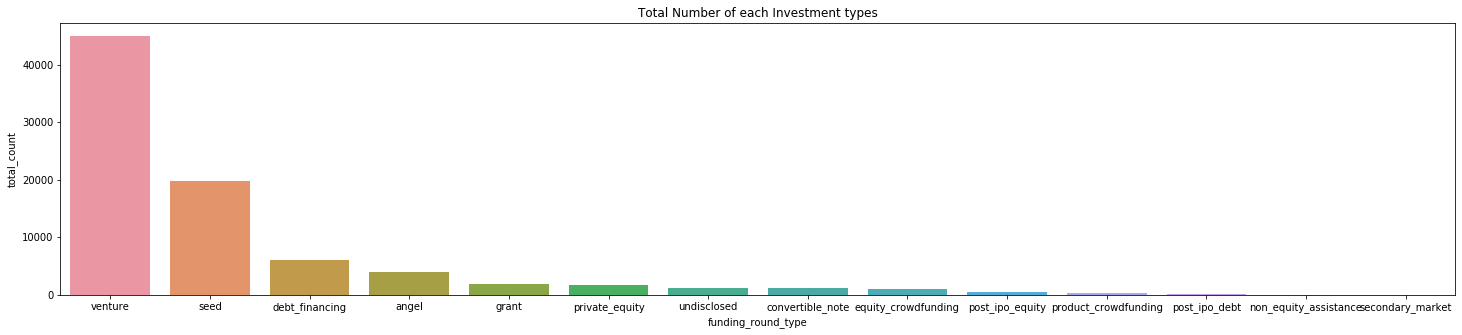

In [38]:
plt.subplots(figsize = (25,5))
sns.barplot(fund_count.funding_round_type,fund_count.total_count)
plt.title('Total Number of each Investment types')
plt.show()

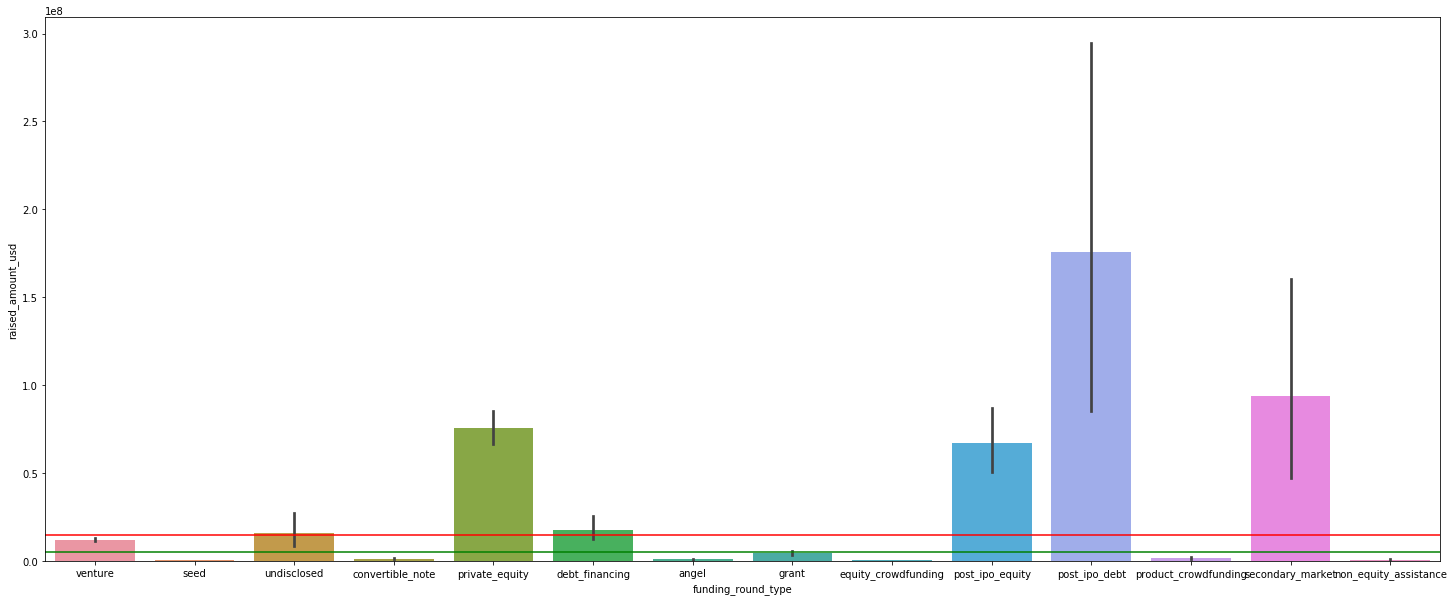

In [39]:
plt.subplots(figsize=(25,10))
sns.barplot(y = master_frame.raised_amount_usd, x = master_frame.funding_round_type, estimator = np.mean)
plt.axhline(5000000, color='green')
plt.axhline(15000000, color='red')
plt.show()

#### 1) Venture, data analysis

In [40]:
master_frame[(master_frame.funding_round_type.isin(['venture']))]

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,Mumbai
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,Beijing
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,Vancouver
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,Mountain View
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,Mountain View
...,...,...,...,...,...,...,...,...,...,...,...
114923,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,555016.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,Fremont
114934,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0,/organization/zyrra,Zyrra,E-Commerce,operating,USA,Cambridge
114936,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8500000.0,/organization/zystor,Zystor,Biotechnology,acquired,USA,Milwaukee
114937,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,29-01-2013,2686600.0,/organization/zytoprotec,Zytoprotec,Biotechnology,operating,AUT,Gerasdorf Bei Wien


In [41]:
master_frame[(master_frame.funding_round_type.isin(['venture']))].raised_amount_usd.describe(percentiles = [0,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.95,1])

count    4.494900e+04
mean     1.190315e+07
std      9.077925e+07
min      0.000000e+00
0%       0.000000e+00
10%      5.000000e+05
20%      1.209286e+06
25%      1.640000e+06
30%      2.098135e+06
40%      3.411412e+06
50%      5.000000e+06
60%      7.000000e+06
70%      1.000000e+07
75%      1.200000e+07
80%      1.500000e+07
90%      2.500000e+07
95%      4.000000e+07
100%     1.760000e+10
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x210518f8128>,
 'caps': [<matplotlib.lines.Line2D at 0x210518f8828>,
 'boxes': [<matplotlib.lines.Line2D at 0x21051919d68>],
 'medians': [<matplotlib.lines.Line2D at 0x210518f8eb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x21051932240>],
 'means': []}

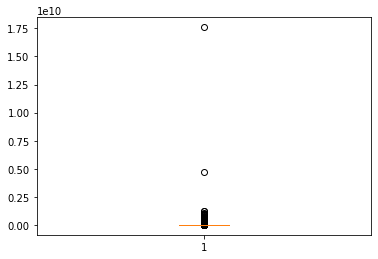

In [42]:
plt.boxplot(master_frame[(master_frame.funding_round_type.isin(['venture']))].raised_amount_usd)

In [43]:
master_frame.shape

(83277, 11)

In [44]:
Q1 = master_frame[(master_frame.funding_round_type.isin(['venture']))].raised_amount_usd.quantile(0.25)
Q3 = master_frame[(master_frame.funding_round_type.isin(['venture']))].raised_amount_usd.quantile(0.75)
IQR = Q3 - Q1

master_frame = master_frame[~(((master_frame.raised_amount_usd < (Q1 - 1.5 * IQR)) |(master_frame.raised_amount_usd > (Q3 + 1.5 * IQR))) & (master_frame.funding_round_type == 'venture'))]


In [45]:
master_frame[(master_frame.funding_round_type.isin(['venture']))].raised_amount_usd.describe(percentiles = [0,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.95,1])  # Mean value of raised_amount for venture type is 6.4 M

count    4.103300e+04
mean     6.466489e+06
std      6.403511e+06
min      0.000000e+00
0%       0.000000e+00
10%      4.744742e+05
20%      1.030108e+06
25%      1.500000e+06
30%      2.000000e+06
40%      3.000000e+06
50%      4.253074e+06
60%      6.000000e+06
70%      8.000000e+06
75%      1.000000e+07
80%      1.100000e+07
90%      1.600000e+07
95%      2.000000e+07
100%     2.751500e+07
max      2.751500e+07
Name: raised_amount_usd, dtype: float64

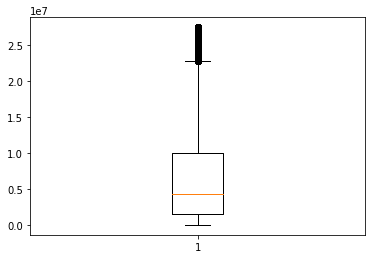

In [46]:
plt.boxplot(master_frame[(master_frame.funding_round_type.isin(['venture']))].raised_amount_usd)
plt.show()

In [47]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79361 entries, 0 to 114947
Data columns (total 11 columns):
company_permalink          79361 non-null object
funding_round_permalink    79361 non-null object
funding_round_type         79361 non-null object
funded_at                  79361 non-null object
raised_amount_usd          79361 non-null float64
permalink                  79361 non-null object
name                       79361 non-null object
category_list              78953 non-null object
status                     79361 non-null object
country_code               79361 non-null object
city                       78313 non-null object
dtypes: float64(1), object(10)
memory usage: 7.3+ MB


#### 2) Seed, data analysis

In [48]:
master_frame[(master_frame.funding_round_type.isin(['seed']))]

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,city
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,Delaware City
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,Vancouver
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,22-05-2013,3000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,Mountain View
13,/organization/1,/funding-round/03b975068632eba5bfdb937ec8c07a68,seed,05-02-2014,150000.0,/organization/1,One Inc.,Mobile,operating,USA,San Francisco
15,/organization/1,/funding-round/e82464f22241715dd1a6c77241055ed1,seed,20-07-2011,1000050.0,/organization/1,One Inc.,Mobile,operating,USA,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
114940,/organization/zzish,/funding-round/73721fffc980d228f051e87422aa8732,seed,24-03-2014,320000.0,/organization/zzish,Zzish,Analytics|Android|Developer APIs|Education|Gam...,operating,GBR,London
114942,/organization/zzzzapp-com,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,01-11-2011,7000.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,Split
114943,/organization/zzzzapp-com,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,01-08-2013,33149.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,Split
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,01-05-2013,32842.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,Split


In [49]:
master_frame[(master_frame.funding_round_type.isin(['seed']))].raised_amount_usd.describe(percentiles = [0,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.95,1])

count    1.984400e+04
mean     7.630973e+05
std      2.327915e+06
min      0.000000e+00
0%       0.000000e+00
10%      2.500000e+04
20%      5.000000e+04
25%      7.432925e+04
30%      1.000000e+05
40%      1.950000e+05
50%      3.100000e+05
60%      5.000000e+05
70%      8.189974e+05
75%      1.000000e+06
80%      1.200000e+06
90%      2.000000e+06
95%      2.500000e+06
100%     2.000000e+08
max      2.000000e+08
Name: raised_amount_usd, dtype: float64

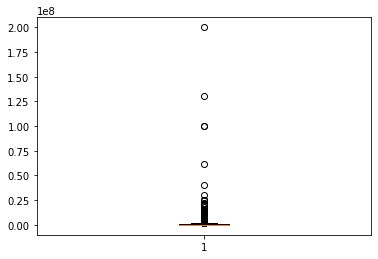

In [50]:
plt.boxplot(master_frame[(master_frame.funding_round_type.isin(['seed']))].raised_amount_usd)
plt.show()

In [51]:
master_frame.shape

(79361, 11)

In [52]:
Q1 = master_frame[(master_frame.funding_round_type.isin(['seed']))].raised_amount_usd.quantile(0.25)
Q2 = master_frame[(master_frame.funding_round_type.isin(['seed']))].raised_amount_usd.quantile(0.75)
IQR = Q2 - Q1

master_frame = master_frame[~(((master_frame.raised_amount_usd < (Q1 - 1.5 * IQR)) |(master_frame.raised_amount_usd > (Q2 + 1.5 * IQR))) & (master_frame.funding_round_type == 'seed'))]


In [53]:
master_frame[(master_frame.funding_round_type.isin(['seed']))].raised_amount_usd.describe()  

count    1.860400e+04
mean     5.266992e+05
std      5.854618e+05
min      0.000000e+00
25%      6.000000e+04
50%      2.650000e+05
75%      8.434465e+05
max      2.380952e+06
Name: raised_amount_usd, dtype: float64

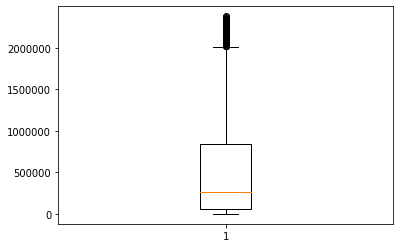

In [54]:
plt.boxplot(master_frame[(master_frame.funding_round_type.isin(['seed']))].raised_amount_usd)
plt.show()

In [55]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78121 entries, 0 to 114947
Data columns (total 11 columns):
company_permalink          78121 non-null object
funding_round_permalink    78121 non-null object
funding_round_type         78121 non-null object
funded_at                  78121 non-null object
raised_amount_usd          78121 non-null float64
permalink                  78121 non-null object
name                       78121 non-null object
category_list              77724 non-null object
status                     78121 non-null object
country_code               78121 non-null object
city                       77090 non-null object
dtypes: float64(1), object(10)
memory usage: 7.2+ MB


#### 3) private equity

In [56]:
master_frame[(master_frame.funding_round_type.isin(['private_equity']))]

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,city
21,/organization/1-800-publicrelations-inc-,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,01-02-2015,6000000.0,/organization/1-800-publicrelations-inc-,"1-800-PublicRelations, Inc.",Internet Marketing|Media|Public Relations,operating,USA,New York
231,/organization/21st-century-oncology,/funding-round/261bff457e1b31c4879e786ab7cf80ab,private_equity,26-09-2014,325000000.0,/organization/21st-century-oncology,21st Century Oncology,Health and Wellness,operating,USA,Fort Myers
312,/organization/2dheat,/funding-round/b1308b31d7a416eb1200b9bb42c9a08f,private_equity,24-10-2014,200708.0,/organization/2dheat,2DHeat,Clean Technology,operating,GBR,Warrington
326,/organization/2nd-story-software-inc,/funding-round/c7647b519b16454c1abe9f310ea2a34c,private_equity,30-03-2005,85000000.0,/organization/2nd-story-software-inc,"2nd Story Software, Inc.",Software,acquired,USA,Cedar Rapids
534,/organization/3power-energy-group,/funding-round/30d107e92eddb3b3791013d29328986d,private_equity,11-03-2011,50000000.0,/organization/3power-energy-group,3POWER ENERGY GROUP,Clean Technology,operating,GBR,Plymouth
...,...,...,...,...,...,...,...,...,...,...,...
114074,/organization/zeta-interactive,/funding-round/ce7dbe2c091876814a7864be462c238a,private_equity,15-07-2015,125000000.0,/organization/zeta-interactive,Zeta Interactive,Advertising,operating,USA,New York
114075,/organization/zeta-interactive,/funding-round/e07bcbc4e6a949f95f0c7e802b6dad02,private_equity,27-06-2012,70000000.0,/organization/zeta-interactive,Zeta Interactive,Advertising,operating,USA,New York
114275,/organization/zimride,/funding-round/51a74eb30b3c0470e84d0f7387be9909,private_equity,30-01-2013,15000000.0,/organization/zimride,Zimride,Public Transportation,acquired,USA,San Francisco
114406,/organization/ziptel,/funding-round/f13b715340329fa9a387f919625cc54d,private_equity,10-11-2014,4319243.0,/organization/ziptel,Ziptel,Communications Hardware|Telecommunications|Wir...,ipo,AUS,Subiaco


In [57]:
master_frame[(master_frame.funding_round_type.isin(['private_equity']))].raised_amount_usd.describe(percentiles = [0,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.95,1])

count    1.731000e+03
mean     7.579720e+07
std      2.061303e+08
min      0.000000e+00
0%       0.000000e+00
10%      1.300000e+06
20%      4.122505e+06
25%      5.400000e+06
30%      7.400000e+06
40%      1.250000e+07
50%      2.100000e+07
60%      3.880992e+07
70%      6.300000e+07
75%      7.699983e+07
80%      1.000000e+08
90%      1.650000e+08
95%      3.000000e+08
100%     4.745460e+09
max      4.745460e+09
Name: raised_amount_usd, dtype: float64

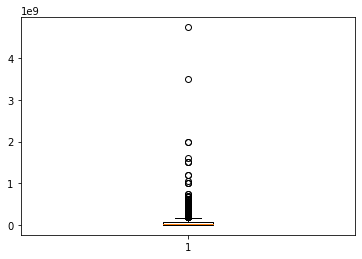

In [58]:
plt.boxplot(master_frame[(master_frame.funding_round_type.isin(['private_equity']))].raised_amount_usd)
plt.show()

In [59]:
master_frame.shape

(78121, 11)

In [60]:
Q1 = master_frame[(master_frame.funding_round_type.isin(['private_equity']))].raised_amount_usd.quantile(0.25)
Q2 = master_frame[(master_frame.funding_round_type.isin(['private_equity']))].raised_amount_usd.quantile(0.75)
IQR = Q2 - Q1

master_frame = master_frame[~(((master_frame.raised_amount_usd < (Q2 - 1.5 * IQR)) |(master_frame.raised_amount_usd > (Q2 + 1.5 * IQR))) & (master_frame.funding_round_type == 'private_equity'))]


In [61]:
master_frame[(master_frame.funding_round_type.isin(['private_equity']))].raised_amount_usd.describe()

count    1.566000e+03
mean     3.565786e+07
std      4.102485e+07
min      0.000000e+00
25%      5.000000e+06
50%      1.600000e+07
75%      5.800000e+07
max      1.750000e+08
Name: raised_amount_usd, dtype: float64

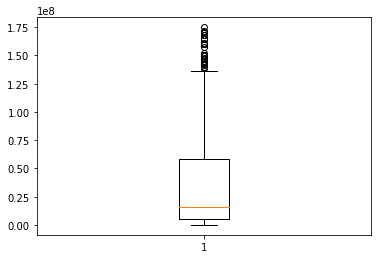

In [62]:
plt.boxplot(master_frame[(master_frame.funding_round_type.isin(['private_equity']))].raised_amount_usd)
plt.show()

In [63]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77956 entries, 0 to 114947
Data columns (total 11 columns):
company_permalink          77956 non-null object
funding_round_permalink    77956 non-null object
funding_round_type         77956 non-null object
funded_at                  77956 non-null object
raised_amount_usd          77956 non-null float64
permalink                  77956 non-null object
name                       77956 non-null object
category_list              77559 non-null object
status                     77956 non-null object
country_code               77956 non-null object
city                       76932 non-null object
dtypes: float64(1), object(10)
memory usage: 7.1+ MB


#### 4) Angel

In [64]:
master_frame[(master_frame.funding_round_type.isin(['angel']))]

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,city
69,/organization/10seconds-software,/funding-round/dacf342722793cb7485fbdbd7530461d,angel,01-07-2010,100000.0,/organization/10seconds-software,10seconds Software,Enterprise Software|Mobility|Software,operating,AUS,Sydney
93,/organization/121nexus,/funding-round/9df05fa02b09752fcd0ecbf4e167cbef,angel,22-01-2013,500000.0,/organization/121nexus,121nexus,Health Diagnostics|Medical Devices|Personaliza...,operating,USA,Providence
106,/organization/12return,/funding-round/5002742a51863b56c788a14348c2c03a,angel,01-06-2012,619494.0,/organization/12return,12Return,Consumer Goods|Retail|SaaS|Software,operating,NLD,Gorinchem
125,/organization/15five,/funding-round/6c390df9112bb5ee560d419450536bd7,angel,15-01-2013,1000000.0,/organization/15five,15Five,Software,operating,USA,San Francisco
126,/organization/15five,/funding-round/e7ce4181f0de392140ff584986340a54,angel,01-01-2012,200000.0,/organization/15five,15Five,Software,operating,USA,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
114874,/organization/zyken-nightcove,/funding-round/c0fb68471480dcd24d2c2a9c4d7199f0,angel,01-01-2007,1777950.0,/organization/zyken-nightcove,Zyken - NightCove,Design|Hardware + Software|Health and Wellness,acquired,FRA,Paris
114888,/organization/zymeworks,/funding-round/79e1f098f8747d5e75495e3c4a21f685,angel,03-03-2008,1300000.0,/organization/zymeworks,Zymeworks,Biotechnology,operating,CAN,Vancouver
114919,/organization/zynstra,/funding-round/dee233b3434185c14b3352034f72d798,angel,18-09-2012,2325000.0,/organization/zynstra,Zynstra,Software,operating,GBR,Bath
114935,/organization/zyrra,/funding-round/cc8cd96a500332d5b4f4bcbddb306099,angel,15-12-2010,875000.0,/organization/zyrra,Zyrra,E-Commerce,operating,USA,Cambridge


In [65]:
master_frame[(master_frame.funding_round_type.isin(['angel']))].raised_amount_usd.describe(percentiles = [0,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.95,1])

count    3.982000e+03
mean     9.947552e+05
std      8.097381e+06
min      0.000000e+00
0%       0.000000e+00
10%      6.000000e+04
20%      1.229080e+05
25%      1.575040e+05
30%      2.000000e+05
40%      3.000000e+05
50%      4.150000e+05
60%      5.500000e+05
70%      8.000000e+05
75%      1.000000e+06
80%      1.058274e+06
90%      1.900000e+06
95%      2.906236e+06
100%     4.945120e+08
max      4.945120e+08
Name: raised_amount_usd, dtype: float64

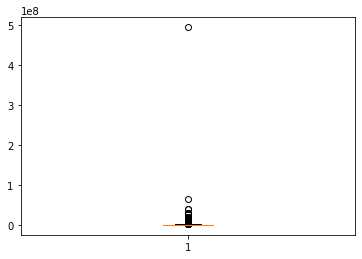

In [66]:
plt.boxplot(master_frame[(master_frame.funding_round_type.isin(['angel']))].raised_amount_usd)
plt.show()

In [67]:
master_frame.shape

(77956, 11)

In [68]:
Q1 = master_frame[(master_frame.funding_round_type.isin(['angel']))].raised_amount_usd.quantile(0.25)
Q2 = master_frame[(master_frame.funding_round_type.isin(['angel']))].raised_amount_usd.quantile(0.75)
IQR = Q2 - Q1

master_frame = master_frame[~(((master_frame.raised_amount_usd < (Q1 - 1.5 * IQR)) |(master_frame.raised_amount_usd > (Q2 + 1.5 * IQR))) & (master_frame.funding_round_type == 'angel'))]


In [69]:
master_frame[(master_frame.funding_round_type.isin(['angel']))].raised_amount_usd.describe() 

count    3.709000e+03
mean     5.446791e+05
std      5.141206e+05
min      0.000000e+00
25%      1.500000e+05
50%      3.750000e+05
75%      8.000000e+05
max      2.250000e+06
Name: raised_amount_usd, dtype: float64

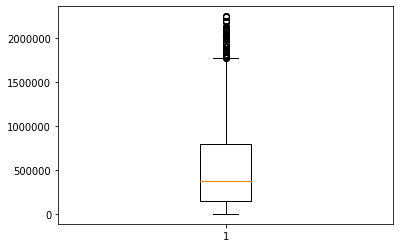

In [70]:
plt.boxplot(master_frame[(master_frame.funding_round_type.isin(['angel']))].raised_amount_usd)
plt.show()

In [71]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,Mumbai
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,Delaware City
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,Beijing
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0,/organization/01games-technology,01Games Technology,Games,operating,HKG,Hong Kong
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,Vancouver
...,...,...,...,...,...,...,...,...,...,...,...
114942,/organization/zzzzapp-com,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,01-11-2011,7000.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,Split
114943,/organization/zzzzapp-com,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,01-08-2013,33149.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,Split
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,01-03-2014,41313.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,Split
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,01-05-2013,32842.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,Split


### Comparision among four different investment type 

In [72]:
master_frame = master_frame[master_frame.funding_round_type.isin(['venture','angel','seed','private_equity'])]

In [73]:
fund_sum = pd.DataFrame(master_frame.groupby(['funding_round_type'])['raised_amount_usd'].sum().sort_values(ascending = False).reset_index(level = 0))
fund_sum

,funding_round_type,raised_amount_usd
0,venture,2.653394e+11
1,private_equity,5.584021e+10
2,seed,9.798712e+09
3,angel,2.020215e+09


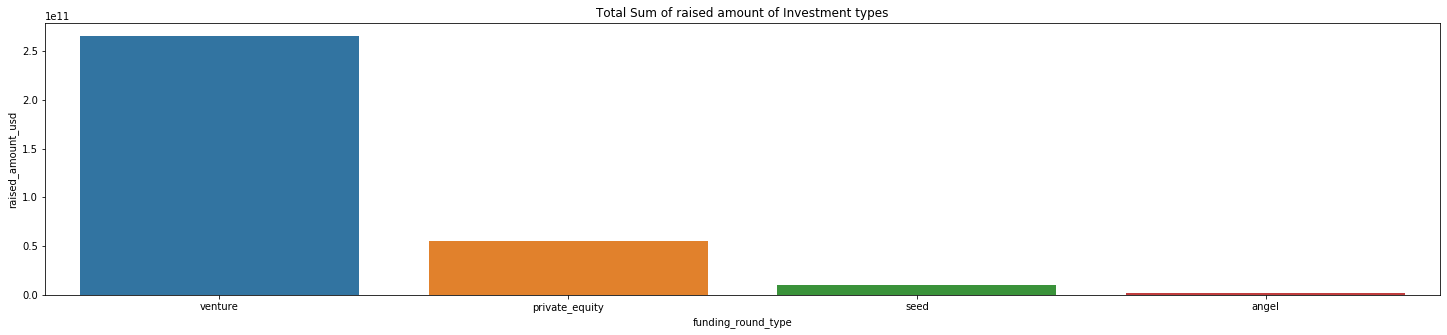

In [74]:
plt.subplots(figsize = (25,5))
sns.barplot(fund_sum.funding_round_type,fund_sum.raised_amount_usd)
plt.title('Total Sum of raised amount of Investment types')
plt.show()

In [75]:
master_frame.funding_round_type.value_counts()

venture           41033
seed              18604
angel              3709
private_equity     1566
Name: funding_round_type, dtype: int64

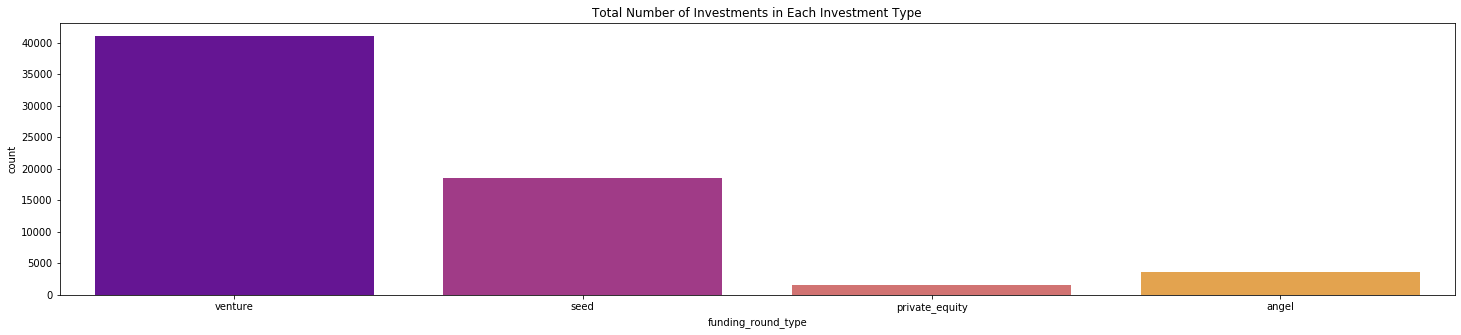

In [76]:
plt.subplots(figsize=(25,5))
sns.countplot(master_frame.funding_round_type,palette = 'plasma')
plt.title('Total Number of Investments in Each Investment Type')
plt.show()

In [77]:
master_frame.groupby(['funding_round_type'])['raised_amount_usd'].mean().sort_values(ascending = False)

funding_round_type
private_equity    3.565786e+07
venture           6.466489e+06
angel             5.446791e+05
seed              5.266992e+05
Name: raised_amount_usd, dtype: float64

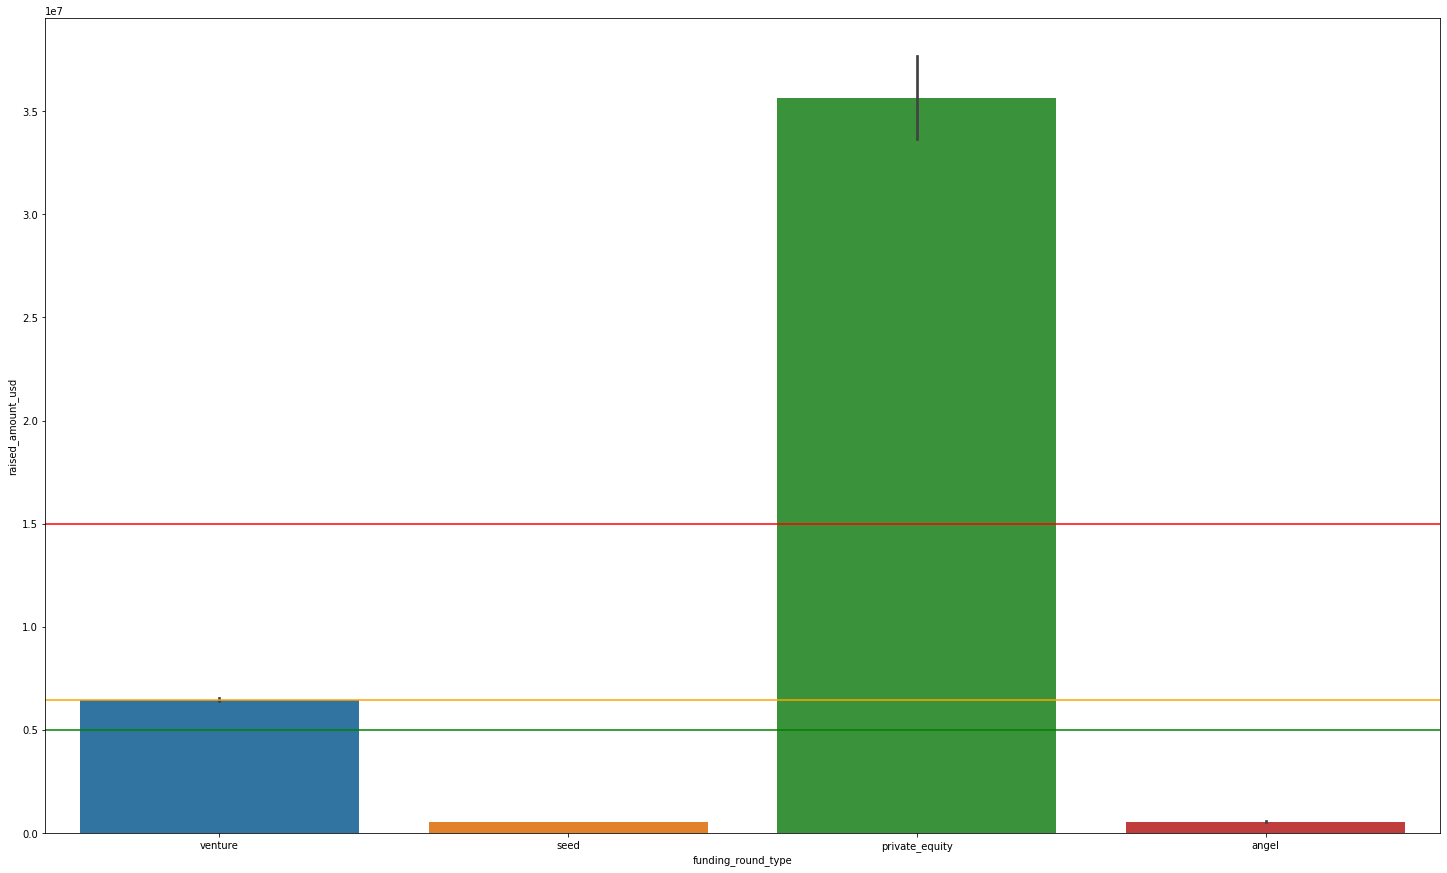

In [78]:
plt.subplots(figsize=(25,15))
sns.barplot(y = master_frame.raised_amount_usd, x = master_frame.funding_round_type, estimator = np.mean)
plt.axhline(15000000,color='red')
plt.axhline(5000000,color='green')
plt.axhline(6.466489e+06,color = 'orange') # Represents the mean value of Venture Type
plt.show()

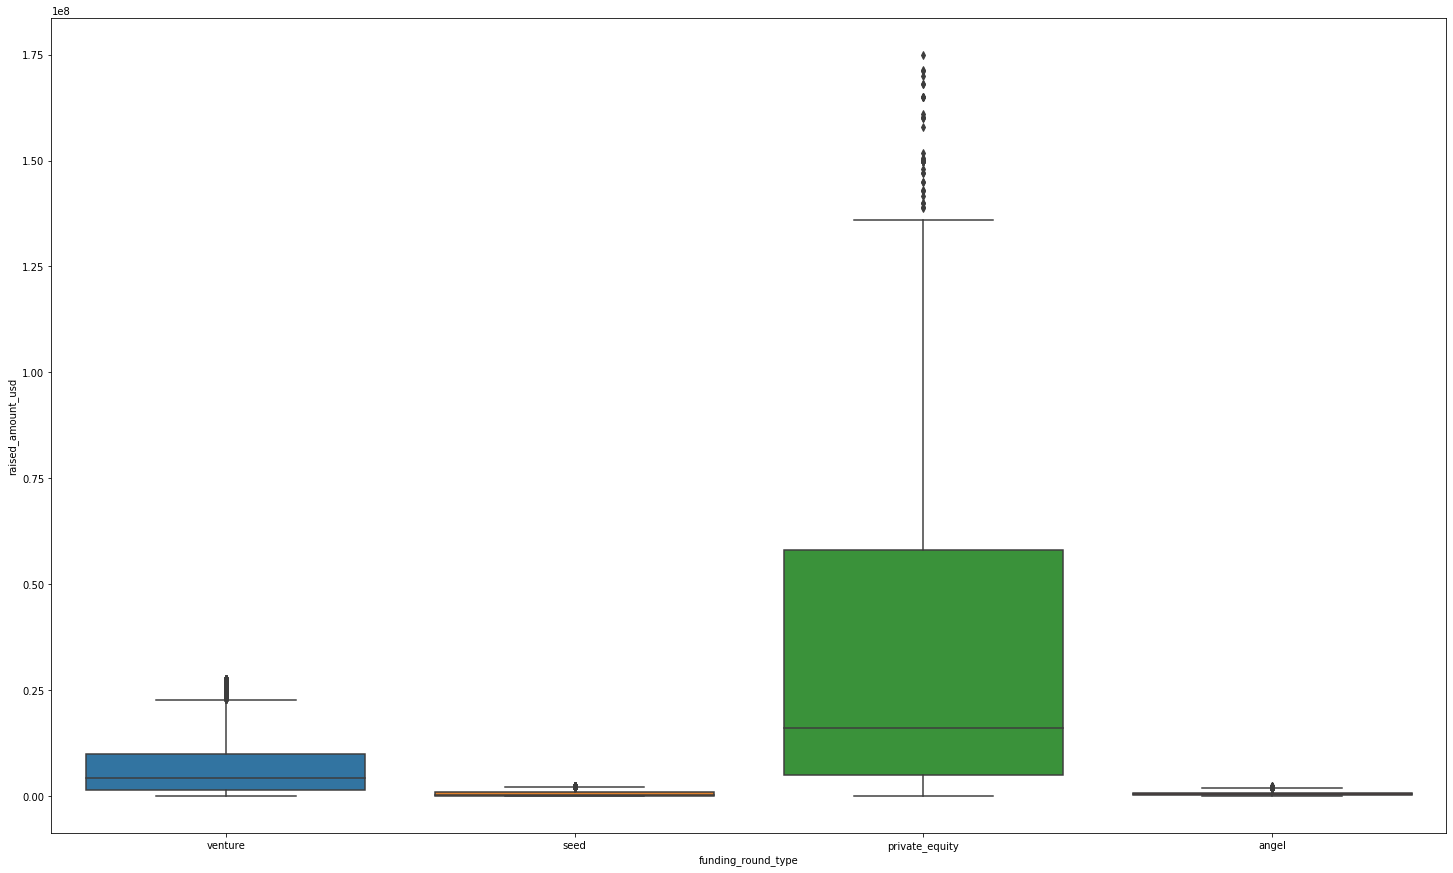

In [79]:
plt.subplots(figsize=(25,15))
sns.boxplot(master_frame.funding_round_type,master_frame.raised_amount_usd)
plt.show()

### Conclusion From Investment Type Analysis :
#### Venture is best suited investment type as the avg amount needed to be invested is about 6.5 M USD which is within the range of 5 M and 15 M USD Furthermore it is also observed that Number of Investments is higher to the type venture and the total amount invested on venture type is high compared to other investments. In case of other three types, the avg USD is not within the range and Number of investments are less

## Checkpoint 3

### Country Analysis

In [80]:
master_frame = master_frame[master_frame.funding_round_type.isin(['venture'])] # Considering only venture investment type
master_frame.isnull().sum()

company_permalink            0
funding_round_permalink      0
funding_round_type           0
funded_at                    0
raised_amount_usd            0
permalink                    0
name                         0
category_list              178
status                       0
country_code                 0
city                       509
dtype: int64

In [81]:
master_frame.country_code.value_counts()[0:9]

USA    30818
GBR     1759
CHN     1218
CAN     1095
FRA      829
ISR      713
IND      696
DEU      484
ESP      279
Name: country_code, dtype: int64

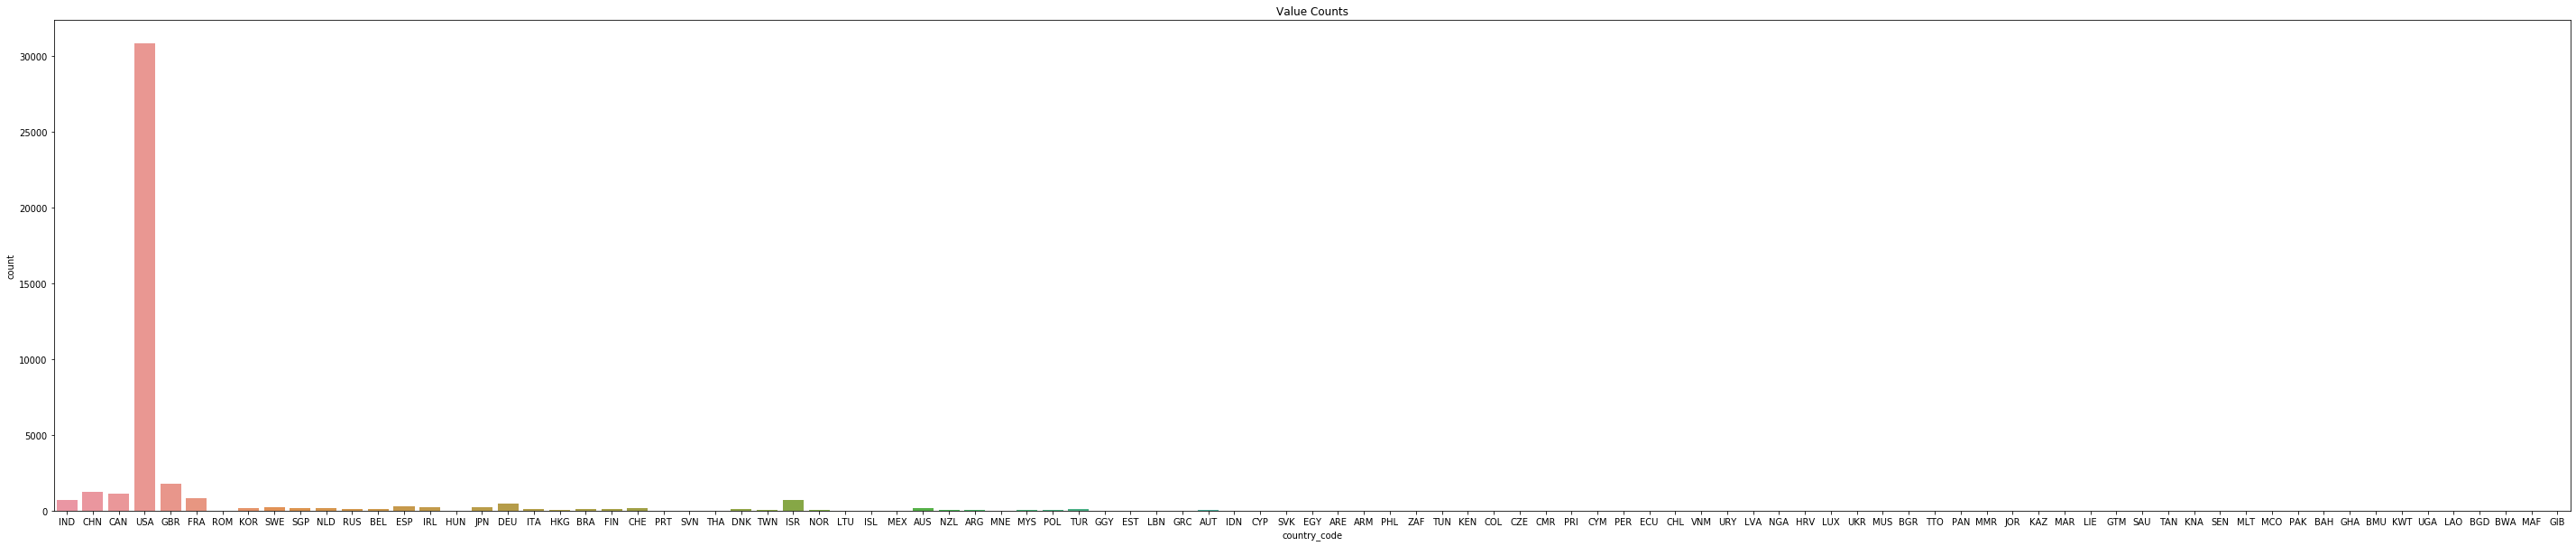

In [82]:
plt.subplots(figsize=(50,10))
sns.countplot(master_frame.country_code) 
plt.title('Value Counts')
plt.show()

In [83]:
x = pd.DataFrame(master_frame.groupby(['country_code'])['raised_amount_usd'].sum().sort_values(ascending = False).reset_index(level=0)[0:9])

In [84]:
x = list(x.country_code)
x


['USA', 'GBR', 'CHN', 'CAN', 'IND', 'ISR', 'FRA', 'DEU', 'CHE']

In [85]:
x1 = master_frame.groupby('country_code').mean().loc[x].reset_index(level=0)#.raised_amount_usd.sort_values(ascending = False)
x2 = master_frame.groupby('country_code').sum().loc[x].reset_index(level=0)
x3 = master_frame.groupby('country_code').median().loc[x].reset_index(level=0)

In [86]:
x1 # Mean Amount

,country_code,raised_amount_usd
0,USA,6.548126e+06
1,GBR,6.066733e+06
2,CHN,8.396834e+06
3,CAN,5.591137e+06
4,IND,7.834632e+06
5,ISR,7.077869e+06
6,FRA,5.448535e+06
7,DEU,7.015514e+06
8,CHE,7.441363e+06


In [87]:
x2 # Total Sum Amount


,country_code,raised_amount_usd
0,USA,2.018002e+11
1,GBR,1.067138e+10
2,CHN,1.022734e+10
3,CAN,6.122295e+09
4,IND,5.452904e+09
5,ISR,5.046521e+09
6,FRA,4.516836e+09
7,DEU,3.395509e+09
8,CHE,1.473390e+09


In [88]:
x3 # Median

,country_code,raised_amount_usd
0,USA,4499980.0
1,GBR,3931350.0
2,CHN,6700000.0
3,CAN,3800000.0
4,IND,5700000.0
5,ISR,5000000.0
6,FRA,3774989.0
7,DEU,5091588.5
8,CHE,4693464.0


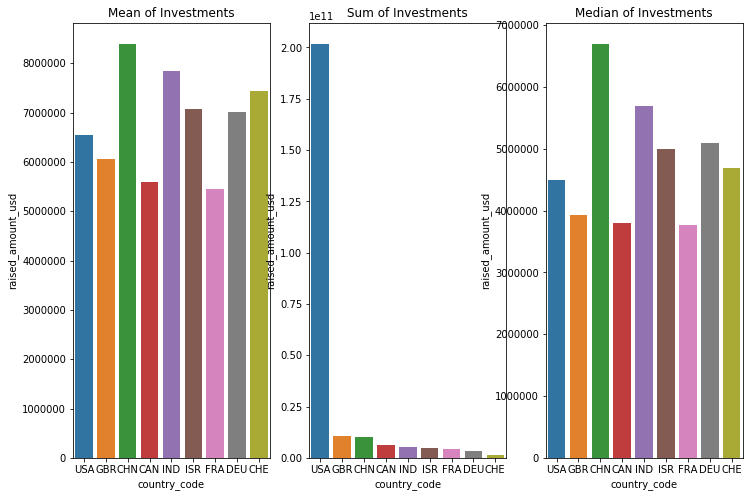

In [89]:
plt.figure(figsize=(12,8))

plt.subplot(1,3,1)
sns.barplot(x1.country_code,x1.raised_amount_usd)
plt.title('Mean of Investments')

plt.subplot(1,3,2)
sns.barplot(x2.country_code,x2.raised_amount_usd)
plt.title('Sum of Investments')

plt.subplot(1,3,3)
sns.barplot(x3.country_code,x3.raised_amount_usd)
plt.title('Median of Investments')


plt.show()

In [90]:
top9 = master_frame[master_frame.country_code.isin(x)]

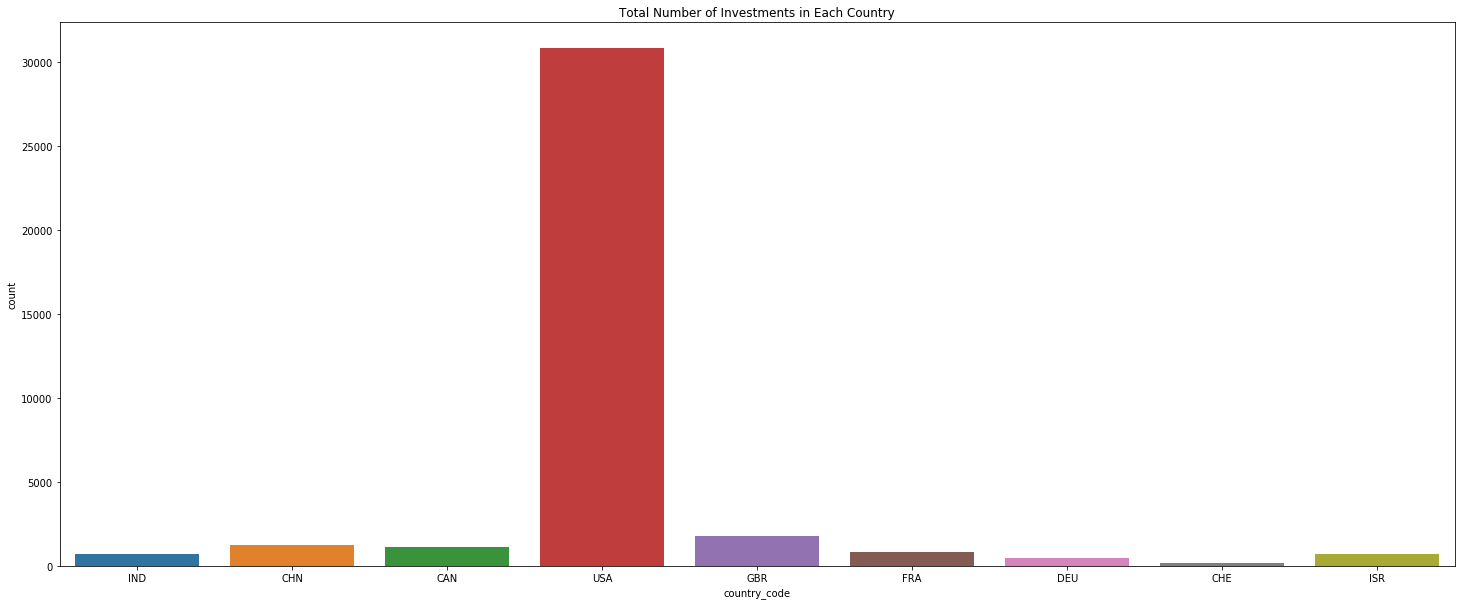

In [91]:
plt.subplots(figsize=(25,10))
sns.countplot(top9.country_code)
plt.title('Total Number of Investments in Each Country')
plt.show()

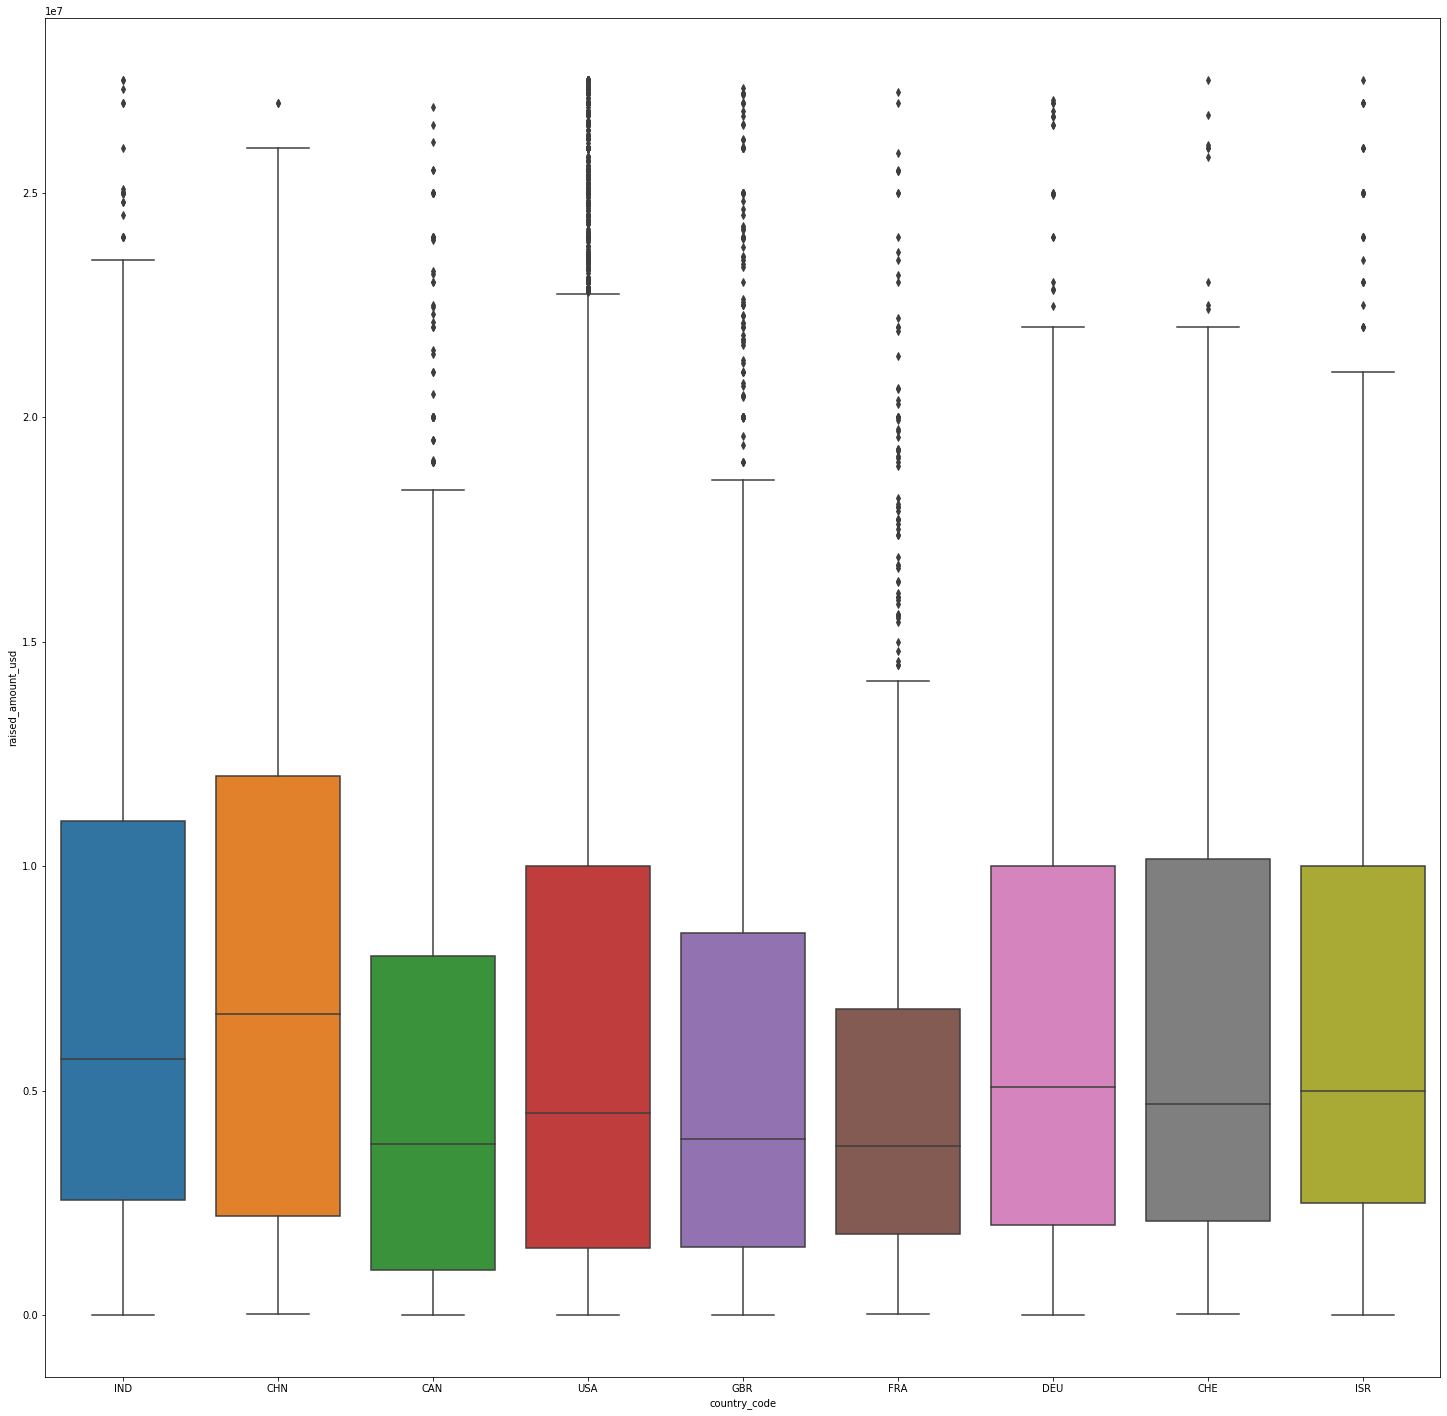

In [92]:
plt.subplots(figsize=(25,25))
sns.boxplot(top9.country_code, top9.raised_amount_usd)
plt.show()

#### From the above analysis plot it is been observed that USA has a better investments when compared to other countries. When we consider the avg investment China stands first but number of investors are very high for USA and preferred the same considering various factors. As Spark Funds want to invest in english speaking countries hence China is not considered for further analysis. Hence the top 3 English speaking countries are preferred accordingly for the above analysis and they are USA, GBR, and CAN, as these 3 countries have better results. Even though IND have better avg when compared to CAN but the Total number of investments and the total amount of investments are higher compared to IND hence CAN is preferred over IND

## Checkpoint 4
### Sector Analysis 1

In [93]:
mappings.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [94]:
mappings  = mappings[~mappings.category_list.isnull()]

#### It is observed that the mappings.csv have some errors in the category list such as Perso0l Health, A0lytics, in place of na hence this error needs to be corrected

In [95]:
def mapping_correction(x):
    if '0' in x:
        if x[0] == '0':
            return x.replace('0','Na')
        elif x[-1] == '0':
            return x
        else:
            return x.replace('0','na')
    else:
        return x
        

In [96]:
mappings.category_list = list(map(mapping_correction,mappings.category_list))

In [97]:
mappings = pd.melt(mappings,id_vars = ['category_list'])
mappings

,category_list,variable,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0
...,...,...,...
6178,Wholesale,"Social, Finance, Analytics, Advertising",0
6179,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
6180,Wireless,"Social, Finance, Analytics, Advertising",0
6181,Women,"Social, Finance, Analytics, Advertising",0


In [98]:
mappings = mappings[mappings.value == 1]
mappings

,category_list,variable,value
7,Adventure Travel,Automotive & Sports,1
13,Aerospace,Automotive & Sports,1
44,Auto,Automotive & Sports,1
45,Automated Kiosk,Automotive & Sports,1
46,Automotive,Automotive & Sports,1
...,...,...,...
6112,Social Recruiting,"Social, Finance, Analytics, Advertising",1
6113,Social Television,"Social, Finance, Analytics, Advertising",1
6114,Social Travel,"Social, Finance, Analytics, Advertising",1
6125,Stock Exchanges,"Social, Finance, Analytics, Advertising",1


In [99]:
mappings = mappings.drop(labels = 'value',axis = 1)
mappings

,category_list,variable
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports
...,...,...
6112,Social Recruiting,"Social, Finance, Analytics, Advertising"
6113,Social Television,"Social, Finance, Analytics, Advertising"
6114,Social Travel,"Social, Finance, Analytics, Advertising"
6125,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [100]:
100* (top9.isnull().sum()/len(top9))

company_permalink          0.000000
funding_round_permalink    0.000000
funding_round_type         0.000000
funded_at                  0.000000
raised_amount_usd          0.000000
permalink                  0.000000
name                       0.000000
category_list              0.412589
status                     0.000000
country_code               0.000000
city                       0.975932
dtype: float64

In [101]:
top9 = top9[~top9.category_list.isnull()]

In [102]:
top9.insert(11,'primary_sectors','NaN')
top9.insert(12,'main_sectors','NaN')
top9.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,city,primary_sectors,main_sectors
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,Mumbai,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,Beijing,NaN,NaN
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,Vancouver,NaN,NaN
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,Mountain View,NaN,NaN
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,Mountain View,NaN,NaN
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,Mountain View,NaN,NaN
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,Cupertino,NaN,NaN
28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.0,/organization/10-minutes-with,10 Minutes With,Education,operating,GBR,London,NaN,NaN
34,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2520000.0,/organization/1000memories,1000memories,Curated Web,acquired,USA,San Francisco,NaN,NaN
38,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,265940.0,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,Lenox,NaN,NaN


In [103]:
top9.primary_sectors = top9.category_list.astype(str).apply(lambda x: x.split('|')[0])
top9


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,city,primary_sectors,main_sectors
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,Mumbai,Media,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,Beijing,Curated Web,NaN
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,Vancouver,Biotechnology,NaN
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,Mountain View,Analytics,NaN
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,Mountain View,Analytics,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114922,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,Fremont,Biotechnology,NaN
114923,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,555016.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,Fremont,Biotechnology,NaN
114934,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0,/organization/zyrra,Zyrra,E-Commerce,operating,USA,Cambridge,E-Commerce,NaN
114936,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8500000.0,/organization/zystor,Zystor,Biotechnology,acquired,USA,Milwaukee,Biotechnology,NaN


In [104]:
cols = list(mappings.variable.unique())
for i in cols:
    top9.loc[top9.primary_sectors.isin(mappings[mappings.variable == i ].category_list),['main_sectors']] = i
    

In [105]:
top9.head()
    

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,city,primary_sectors,main_sectors
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,Mumbai,Media,Entertainment
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,Beijing,Curated Web,"News, Search and Messaging"
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,Vancouver,Biotechnology,Cleantech / Semiconductors
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,Mountain View,Analytics,"Social, Finance, Analytics, Advertising"
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,Mountain View,Analytics,"Social, Finance, Analytics, Advertising"


In [106]:
top9[top9.main_sectors == 'NaN']

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,city,primary_sectors,main_sectors
20328,/organization/clean-vehicle-solutions,/funding-round/7b991c526219c2edff8789942215d93b,venture,26-02-2010,125000.0,/organization/clean-vehicle-solutions,Clean Vehicle Solutions,Natural Gas Uses|Service Providers|Services,operating,USA,East Brunswick,Natural Gas Uses,NaN
28541,/organization/dolores-speech-products,/funding-round/ba7393d89b2a5ad0c076e2295794c4ce,venture,07-04-2015,250000.0,/organization/dolores-speech-products,Dolores Speech Products,Adaptive Equipment|Innovation Management|Speec...,operating,USA,Wellesley,Adaptive Equipment,NaN
43506,/organization/healthtell,/funding-round/8edf7332fface9972541807a248690b3,venture,13-06-2014,9486929.0,/organization/healthtell,HealthTell,Biotechnology and Semiconductor|Diagnostics|He...,operating,USA,San Ramon,Biotechnology and Semiconductor,NaN
51816,/organization/justinmind,/funding-round/c6e9adcef86247dccf8418dc3e4b9a0b,venture,17-12-2007,862000.0,/organization/justinmind,Justinmind,Rapidly Expanding|Software|Usability|User Expe...,operating,USA,San Francisco,Rapidly Expanding,NaN
87657,/organization/sense-labs-inc-,/funding-round/1ed09dae5b9feaba2ae7f56dd1b9bfd2,venture,29-12-2014,2499999.0,/organization/sense-labs-inc-,Sense,GreenTech|Hardware|Home Automation|Internet of...,operating,USA,Cambridge,GreenTech,NaN
106150,/organization/velocomp,/funding-round/2cdceb89206aad240a78e58329cec171,venture,09-09-2011,1420000.0,/organization/velocomp,Velocomp,Adaptive Equipment|Sporting Goods,operating,USA,Boca Raton,Adaptive Equipment,NaN


#### The above primary_sectors doesnot exists in mappings.csv

In [107]:
top9 = top9[~(top9.main_sectors == 'NaN')]

In [108]:
top9.shape

(37648, 13)

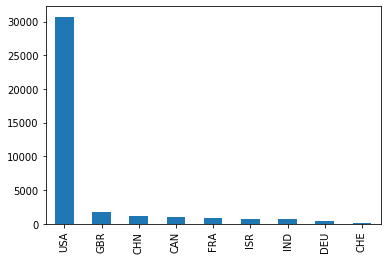

In [109]:
top9.country_code.value_counts().plot(kind='bar')
plt.show()

## Checkpoint 5
### SectorAnalysis 2

In [110]:
D1 = top9[top9.country_code == 'USA']

In [111]:
D2 = top9[top9.country_code == 'GBR']

In [112]:
D3 = top9[top9.country_code == 'CAN']

In [113]:
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,city,primary_sectors,main_sectors
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,Mountain View,Analytics,"Social, Finance, Analytics, Advertising"
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,Mountain View,Analytics,"Social, Finance, Analytics, Advertising"
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,Mountain View,Analytics,"Social, Finance, Analytics, Advertising"
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,Cupertino,Apps,"News, Search and Messaging"
34,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2520000.0,/organization/1000memories,1000memories,Curated Web,acquired,USA,San Francisco,Curated Web,"News, Search and Messaging"


In [114]:
D1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30699 entries, 10 to 114936
Data columns (total 13 columns):
company_permalink          30699 non-null object
funding_round_permalink    30699 non-null object
funding_round_type         30699 non-null object
funded_at                  30699 non-null object
raised_amount_usd          30699 non-null float64
permalink                  30699 non-null object
name                       30699 non-null object
category_list              30699 non-null object
status                     30699 non-null object
country_code               30699 non-null object
city                       30676 non-null object
primary_sectors            30699 non-null object
main_sectors               30699 non-null object
dtypes: float64(1), object(12)
memory usage: 3.3+ MB


In [115]:
D1.isnull().sum()

company_permalink           0
funding_round_permalink     0
funding_round_type          0
funded_at                   0
raised_amount_usd           0
permalink                   0
name                        0
category_list               0
status                      0
country_code                0
city                       23
primary_sectors             0
main_sectors                0
dtype: int64

In [116]:
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,city,primary_sectors,main_sectors
28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.0,/organization/10-minutes-with,10 Minutes With,Education,operating,GBR,London,Education,Others
368,/organization/31dover,/funding-round/b95cb5a74632e596e19a845e405ef14b,venture,01-03-2014,2274716.0,/organization/31dover,31Dover,E-Commerce|Wine And Spirits,operating,GBR,London,E-Commerce,Others
401,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,5500000.0,/organization/365scores,365Scores,Android|Apps|iPhone|Mobile|Sports,operating,GBR,London,Android,"Social, Finance, Analytics, Advertising"
402,/organization/365scores,/funding-round/493f78ea0ca33cfac48a57b2351b154b,venture,28-01-2013,1200000.0,/organization/365scores,365Scores,Android|Apps|iPhone|Mobile|Sports,operating,GBR,London,Android,"Social, Finance, Analytics, Advertising"
550,/organization/3sun,/funding-round/f1d8c6491b45bcf2a35ef1cf5cae96c4,venture,03-03-2014,15152514.0,/organization/3sun,3sun,Clean Technology,operating,GBR,NaN,Clean Technology,Cleantech / Semiconductors


In [117]:
D2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 28 to 114917
Data columns (total 13 columns):
company_permalink          1751 non-null object
funding_round_permalink    1751 non-null object
funding_round_type         1751 non-null object
funded_at                  1751 non-null object
raised_amount_usd          1751 non-null float64
permalink                  1751 non-null object
name                       1751 non-null object
category_list              1751 non-null object
status                     1751 non-null object
country_code               1751 non-null object
city                       1649 non-null object
primary_sectors            1751 non-null object
main_sectors               1751 non-null object
dtypes: float64(1), object(12)
memory usage: 191.5+ KB


In [118]:
D2.isnull().sum()

company_permalink            0
funding_round_permalink      0
funding_round_type           0
funded_at                    0
raised_amount_usd            0
permalink                    0
name                         0
category_list                0
status                       0
country_code                 0
city                       102
primary_sectors              0
main_sectors                 0
dtype: int64

In [119]:
D3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1087 entries, 8 to 114894
Data columns (total 13 columns):
company_permalink          1087 non-null object
funding_round_permalink    1087 non-null object
funding_round_type         1087 non-null object
funded_at                  1087 non-null object
raised_amount_usd          1087 non-null float64
permalink                  1087 non-null object
name                       1087 non-null object
category_list              1087 non-null object
status                     1087 non-null object
country_code               1087 non-null object
city                       1081 non-null object
primary_sectors            1087 non-null object
main_sectors               1087 non-null object
dtypes: float64(1), object(12)
memory usage: 118.9+ KB


In [120]:
D3.isnull().sum()

company_permalink          0
funding_round_permalink    0
funding_round_type         0
funded_at                  0
raised_amount_usd          0
permalink                  0
name                       0
category_list              0
status                     0
country_code               0
city                       6
primary_sectors            0
main_sectors               0
dtype: int64

#### Analysis On D1 dataframe

In [121]:
D1.shape

(30699, 13)

In [122]:
D1 = D1[(D1.raised_amount_usd <= 15000000) & (D1.raised_amount_usd >= 5000000)]

In [123]:
D1.shape

(11286, 13)

In [124]:
Total_Amount = D1.raised_amount_usd.sum()
Total_Amount

101000666779.0

In [125]:
Total_Mean = D1.raised_amount_usd.mean()
Total_Mean

8949199.60827574

In [126]:
Total_Median = D1.raised_amount_usd.median()
Total_Median

8400000.0

In [127]:
Sum_Amount = pd.DataFrame(D1.groupby(['main_sectors'])['raised_amount_usd'].sum().sort_values(ascending = False).reset_index(level=0))

In [128]:
Mean_Amount = pd.DataFrame(D1.groupby(['main_sectors'])['raised_amount_usd'].mean().sort_values(ascending = False).reset_index(level=0))

In [129]:
Mean_Amount['raised_amount_usd %'] = round(100*(Mean_Amount.raised_amount_usd / Total_Mean),2)

In [130]:
Mean_Amount

,main_sectors,raised_amount_usd,raised_amount_usd %
0,Cleantech / Semiconductors,9.179893e+06,102.58
1,Health,9.068888e+06,101.34
2,Manufacturing,9.066413e+06,101.31
3,Others,8.932813e+06,99.82
4,"News, Search and Messaging",8.866149e+06,99.07
5,"Social, Finance, Analytics, Advertising",8.814969e+06,98.50
6,Automotive & Sports,8.753531e+06,97.81
7,Entertainment,8.668079e+06,96.86


#### Percentage of Raised Amount distributed Over Various Sectors

In [131]:
Sum_Amount['raised_amount_usd %'] = round(100*(Sum_Amount.raised_amount_usd / Total_Amount),2)

In [132]:
Sum_Amount

,main_sectors,raised_amount_usd,raised_amount_usd %
0,Others,2.463670e+10,24.39
1,"Social, Finance, Analytics, Advertising",2.283077e+10,22.60
2,Cleantech / Semiconductors,2.012233e+10,19.92
3,"News, Search and Messaging",1.298891e+10,12.86
4,Health,7.744830e+09,7.67
5,Manufacturing,6.700079e+09,6.63
6,Entertainment,4.602750e+09,4.56
7,Automotive & Sports,1.374304e+09,1.36


In [133]:
res1 = pd.pivot_table(data = D1, index = 'country_code', columns = 'main_sectors', values = 'raised_amount_usd', aggfunc = 'sum')
res2 = pd.pivot_table(data = D1, index = 'country_code', columns = 'main_sectors', values = 'raised_amount_usd', aggfunc = 'mean')

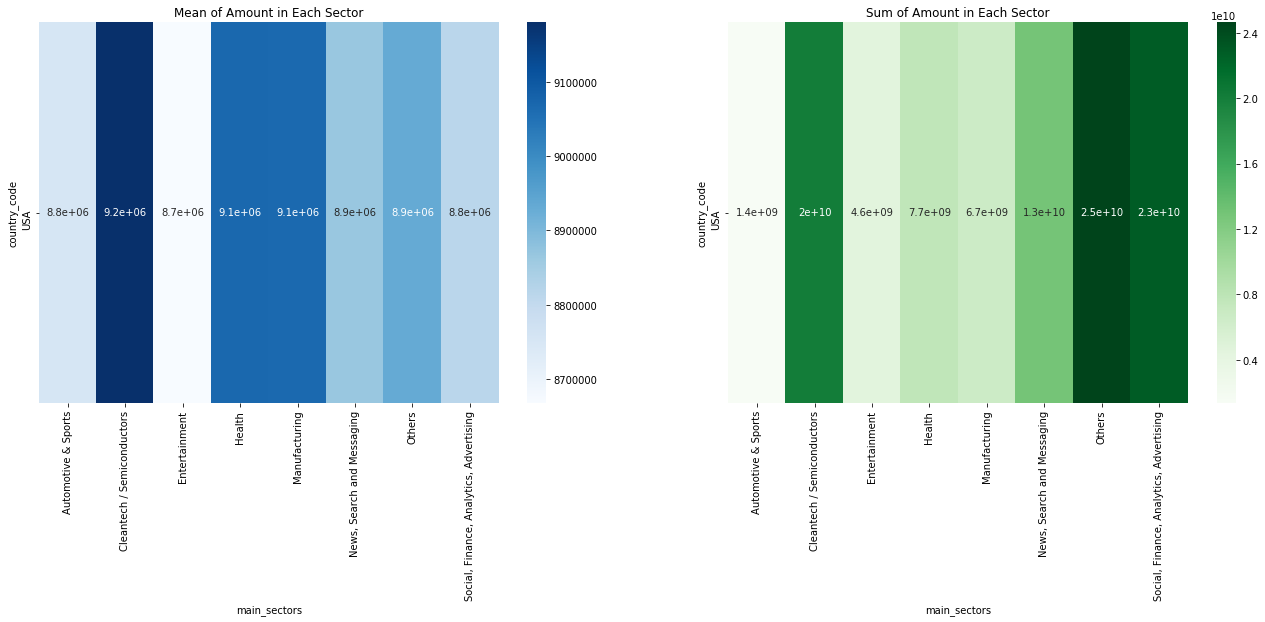

In [134]:
plt.subplots(figsize=(35,7))

plt.subplot(1,3,1)
sns.heatmap(res2,cmap = 'Blues', annot = True)
plt.title('Mean of Amount in Each Sector')

plt.subplot(1,3,2)
sns.heatmap(res1,cmap = 'Greens', annot = True)
plt.title('Sum of Amount in Each Sector')


plt.show()

In [135]:
Total_number_investment = pd.DataFrame(D1.main_sectors.value_counts().sort_values(ascending = False).reset_index(level = 0))
Total_number_investment

,index,main_sectors
0,Others,2758
1,"Social, Finance, Analytics, Advertising",2590
2,Cleantech / Semiconductors,2192
3,"News, Search and Messaging",1465
4,Health,854
5,Manufacturing,739
6,Entertainment,531
7,Automotive & Sports,157


In [136]:
Total_number_investment = Total_number_investment.rename(columns={'index':'main_sectors', 'main_sectors':'total_count'})

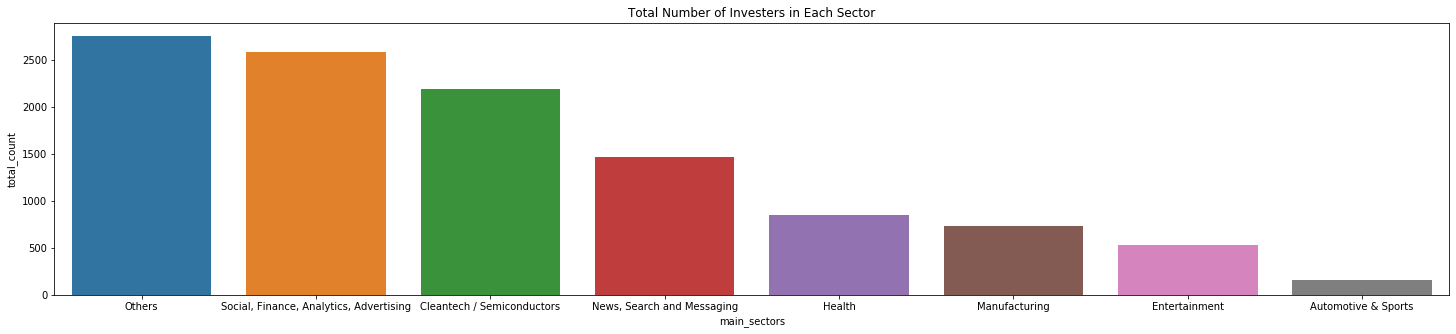

In [137]:
plt.subplots(figsize = (25,5))
sns.barplot(Total_number_investment.main_sectors,Total_number_investment.total_count)
plt.title("Total Number of Investers in Each Sector")
plt.show()

#### Top 3 Main_Sectors Invested in USA

In [138]:
Total_number_investment[0:3]

,main_sectors,total_count
0,Others,2758
1,"Social, Finance, Analytics, Advertising",2590
2,Cleantech / Semiconductors,2192


#### Total Amount in Each Sector in USA

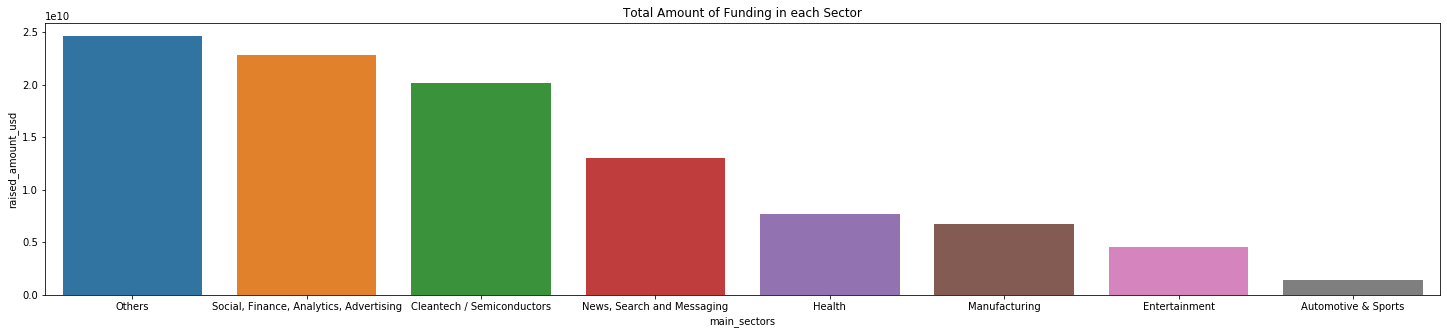

In [139]:
Total_Sum_Amount = pd.DataFrame(D1.groupby(['main_sectors'])['raised_amount_usd'].sum().sort_values(ascending = False).reset_index(level = 0))
plt.subplots(figsize = (25,5))
sns.barplot(Total_Sum_Amount.main_sectors,Total_Sum_Amount.raised_amount_usd)
plt.title("Total Amount of Funding in each Sector")
plt.show()


#### Top 3 Total Amount of Funding in main_sectors in USA

In [140]:
Total_Sum_Amount[0:3]

,main_sectors,raised_amount_usd
0,Others,2.463670e+10
1,"Social, Finance, Analytics, Advertising",2.283077e+10
2,Cleantech / Semiconductors,2.012233e+10


#### Top 3 Cities to do the Investment 

In [141]:
D1.city.value_counts()[0:3]

San Francisco    1220
New York          904
Mountain View     336
Name: city, dtype: int64

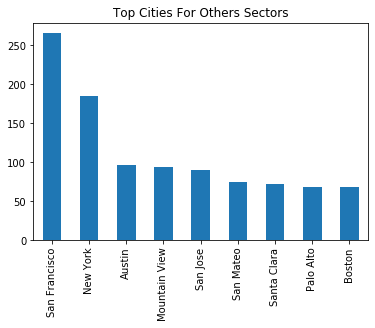

In [142]:
D1[(D1.main_sectors == 'Others')].city.value_counts()[0:9].plot(kind = 'bar')
plt.title('Top Cities For Others Sectors')
plt.show()

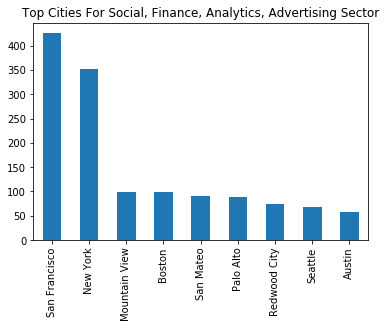

In [143]:
D1[(D1.main_sectors == 'Social, Finance, Analytics, Advertising')].city.value_counts()[0:9].plot(kind = 'bar')
plt.title('Top Cities For Social, Finance, Analytics, Advertising Sector')
plt.show()

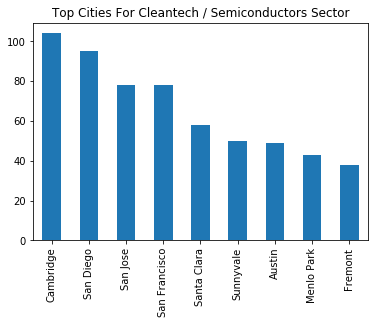

In [144]:
D1[(D1.main_sectors == 'Cleantech / Semiconductors')].city.value_counts()[0:9].plot(kind = 'bar')
plt.title('Top Cities For Cleantech / Semiconductors Sector')
plt.show()

In [145]:
D1.city = D1.city.fillna('San Francisco')

In [146]:
D1.city.isnull().sum()

0

#### Top Companies in USA for top 3 Sectors

##### Top Companies in Others Sectors

In [147]:
Top_Company = D1[(D1.main_sectors == 'Others')]
Top_Company.raised_amount_usd.sum()

24636698580.0

In [148]:
x = pd.DataFrame(Top_Company.groupby(['name'])['raised_amount_usd'].sum().sort_values(ascending = False)[0:9].reset_index(level=0))

In [149]:
x['raised_amount_usd %'] = 100 * (x.raised_amount_usd / (Top_Company.raised_amount_usd.sum()))

In [150]:
x

,name,raised_amount_usd,raised_amount_usd %
0,Virtustream,64300000.0,0.260993
1,Capella Photonics,54968051.0,0.223115
2,AirTight Networks,54201907.0,0.220005
3,deCarta,52100000.0,0.211473
4,Black Duck Software,51000000.0,0.207008
5,Approva,50100000.0,0.203355
6,Five9,49600000.0,0.201326
7,Bit9,48433533.0,0.196591
8,Aryaka Networks,48166500.0,0.195507


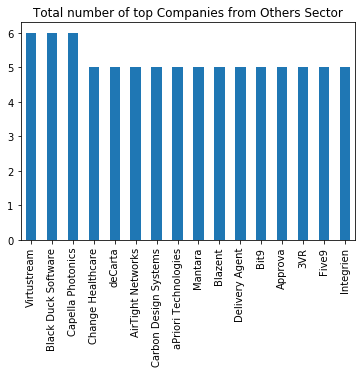

In [151]:
Top_Company.name.value_counts()[0:16].plot(kind ='bar' )
plt.title('Total number of top Companies from Others Sector')
plt.show()

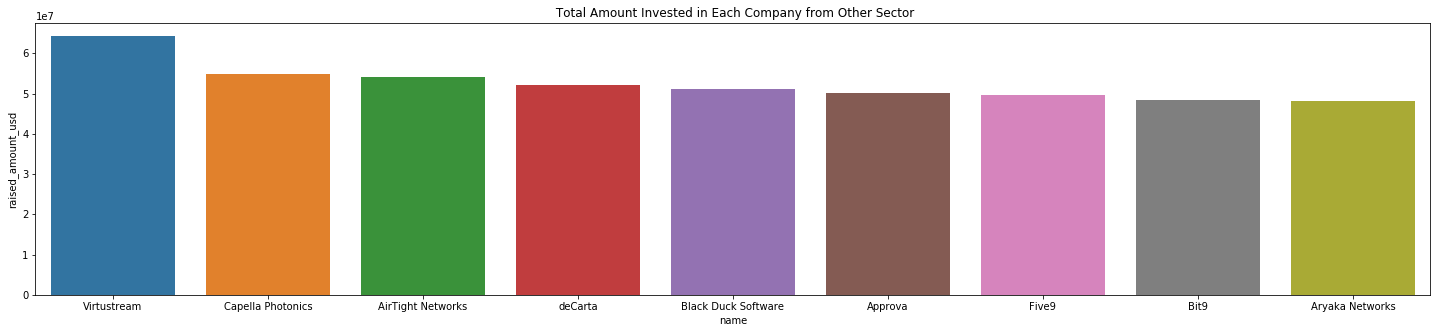

In [152]:
plt.subplots(figsize = (25,5))
sns.barplot(x.name,x.raised_amount_usd)
plt.title(' Total Amount Invested in Each Company from Other Sector')
plt.show()

##### Top Companies in 'Social, Finance, Analytics, Advertising' Sectors

In [153]:
Top_Company = D1[(D1.main_sectors == 'Social, Finance, Analytics, Advertising')]
Top_Company.raised_amount_usd.sum()

22830769582.0

In [154]:
x = pd.DataFrame(Top_Company.groupby(['name'])['raised_amount_usd'].sum().sort_values(ascending = False)[0:9].reset_index(level=0))

x['raised_amount_usd %'] = 100 * (x.raised_amount_usd / (Top_Company.raised_amount_usd.sum()))

In [155]:
x

,name,raised_amount_usd,raised_amount_usd %
0,SST Inc. (Formerly ShotSpotter),67933006.0,0.297550
1,Demandbase,63000000.0,0.275943
2,Intacct,61800000.0,0.270687
3,NetBase Solutions,60600000.0,0.265431
4,Lotame,59700000.0,0.261489
5,FirstRain,58344731.0,0.255553
6,ChoiceStream,58300000.0,0.255357
7,OpTier,55600000.0,0.243531
8,Damballa,55000000.0,0.240903


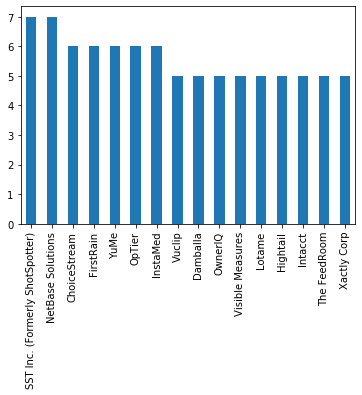

In [156]:
Top_Company.name.value_counts()[0:16].plot(kind ='bar' )
plt.show()

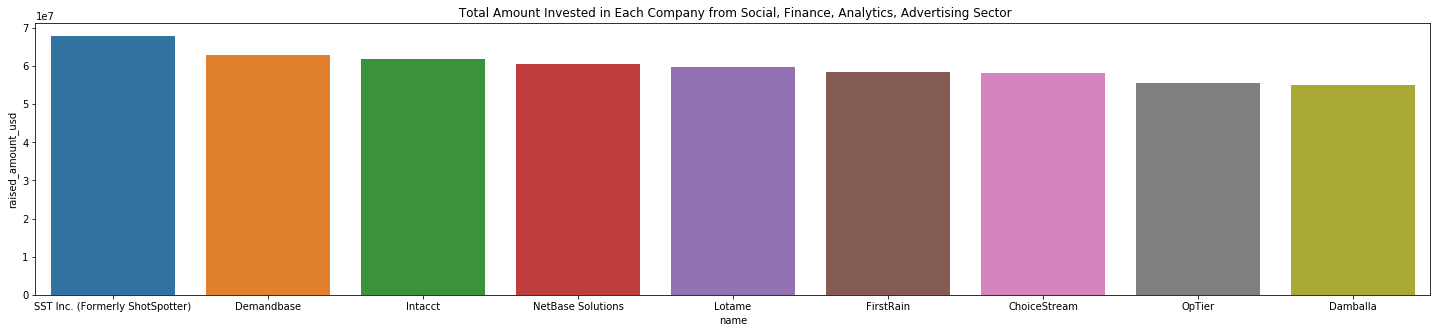

In [157]:
plt.subplots(figsize = (25,5))
sns.barplot(x.name,x.raised_amount_usd)
plt.title(' Total Amount Invested in Each Company from Social, Finance, Analytics, Advertising Sector')

plt.show()

##### Top Companies in 'Cleantech / Semiconductors' Sectors

In [158]:
Top_Company = D1[(D1.main_sectors == 'Cleantech / Semiconductors')]
Top_Company.raised_amount_usd.sum()

20122326351.0

In [159]:
x = pd.DataFrame(Top_Company.groupby(['name'])['raised_amount_usd'].sum().sort_values(ascending = False)[0:9].reset_index(level=0))

x['raised_amount_usd %'] = 100 * (x.raised_amount_usd / (Top_Company.raised_amount_usd.sum()))

In [160]:
x

,name,raised_amount_usd,raised_amount_usd %
0,Biodesix,75300000.0,0.374211
1,Tigo Energy,68739496.0,0.341608
2,ForSight Labs,61300001.0,0.304637
3,Cambrios Technologies,56891022.0,0.282726
4,Rheonix,56124758.0,0.278918
5,SCIenergy,55375423.0,0.275194
6,ALung Technologies,54110403.0,0.268907
7,Metabolon,52420551.0,0.260509
8,Stretch,52000000.0,0.258419


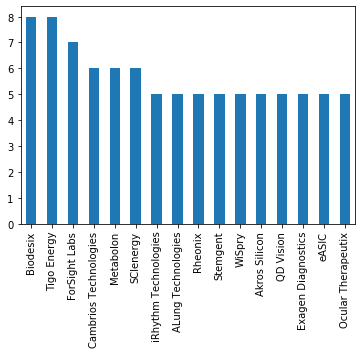

In [161]:
Top_Company.name.value_counts()[0:16].plot(kind ='bar' )
plt.show()

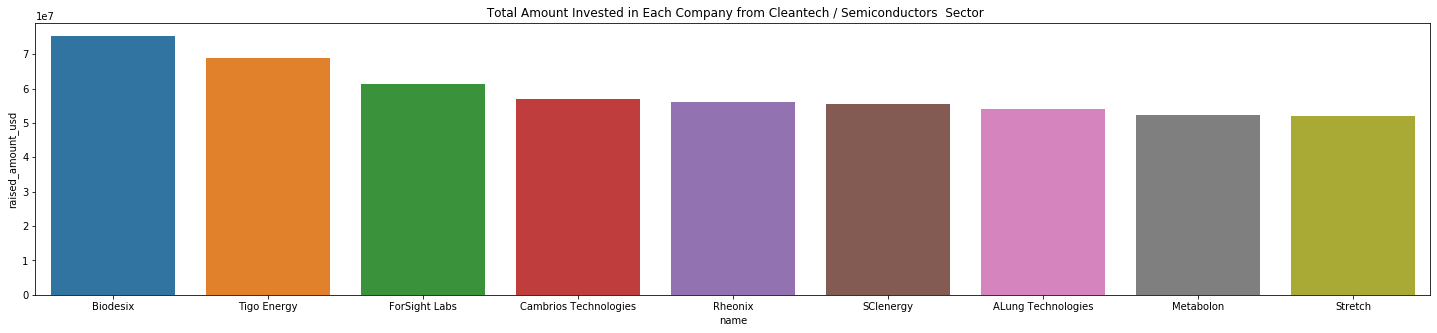

In [162]:
plt.subplots(figsize = (25,5))
plt.title(' Total Amount Invested in Each Company from Cleantech / Semiconductors  Sector')
sns.barplot(x.name,x.raised_amount_usd)
plt.show()

#### From the Above Analysis it is observed that the top three main sectors in USA are (Others ), (Social, Finance, Analytics, Advertising),(Cleantech / Semiconductors	) and Most desirable Cities to Invest is San Francisco, New York, Mountain View

#### D2 Analysis

In [163]:
D2 = D2[(D2.raised_amount_usd <= 15000000) & (D2.raised_amount_usd >= 5000000)]


In [164]:
D2.shape

(582, 13)

In [165]:
Total_Amount = D2.raised_amount_usd.sum()
Total_Amount

5053293406.0

In [166]:
Total_Mean = D2.raised_amount_usd.mean()
Total_Mean

8682634.718213059

In [167]:
Total_Median = D2.raised_amount_usd.median()
Total_Median

8000000.0

In [168]:
Sum_Amount = pd.DataFrame(D2.groupby(['main_sectors'])['raised_amount_usd'].sum().sort_values(ascending = False).reset_index(level=0))


In [169]:
Mean_Amount = pd.DataFrame(D2.groupby(['main_sectors'])['raised_amount_usd'].mean().sort_values(ascending = False).reset_index(level=0))


In [170]:
Median_Amount = pd.DataFrame(D2.groupby(['main_sectors'])['raised_amount_usd'].median().sort_values(ascending = False).reset_index(level=0))

Median_Amount

,main_sectors,raised_amount_usd
0,Automotive & Sports,10945000.0
1,Cleantech / Semiconductors,9163350.0
2,Entertainment,8800000.0
3,Others,8000000.0
4,Manufacturing,7965208.0
5,Health,7781818.0
6,"Social, Finance, Analytics, Advertising",7730383.5
7,"News, Search and Messaging",7530000.0


In [171]:
Mean_Amount['raised_amount_usd %'] = round(100*(Mean_Amount.raised_amount_usd / Total_Mean),2)

Mean_Amount


,main_sectors,raised_amount_usd,raised_amount_usd %
0,Automotive & Sports,1.044072e+07,120.25
1,Cleantech / Semiconductors,9.037020e+06,104.08
2,Health,8.805979e+06,101.42
3,Entertainment,8.745560e+06,100.72
4,Others,8.681730e+06,99.99
5,Manufacturing,8.583107e+06,98.85
6,"News, Search and Messaging",8.462132e+06,97.46
7,"Social, Finance, Analytics, Advertising",8.239282e+06,94.89


#### Percentage of Raised Amount distributed Over Various Sectors

In [172]:
Sum_Amount['raised_amount_usd %'] = round(100*(Sum_Amount.raised_amount_usd / Total_Amount),2)

Sum_Amount

,main_sectors,raised_amount_usd,raised_amount_usd %
0,Others,1.215442e+09,24.05
1,"Social, Finance, Analytics, Advertising",1.054628e+09,20.87
2,Cleantech / Semiconductors,1.048294e+09,20.74
3,"News, Search and Messaging",5.585007e+08,11.05
4,Entertainment,4.635147e+08,9.17
5,Manufacturing,3.433243e+08,6.79
6,Health,2.025375e+08,4.01
7,Automotive & Sports,1.670516e+08,3.31


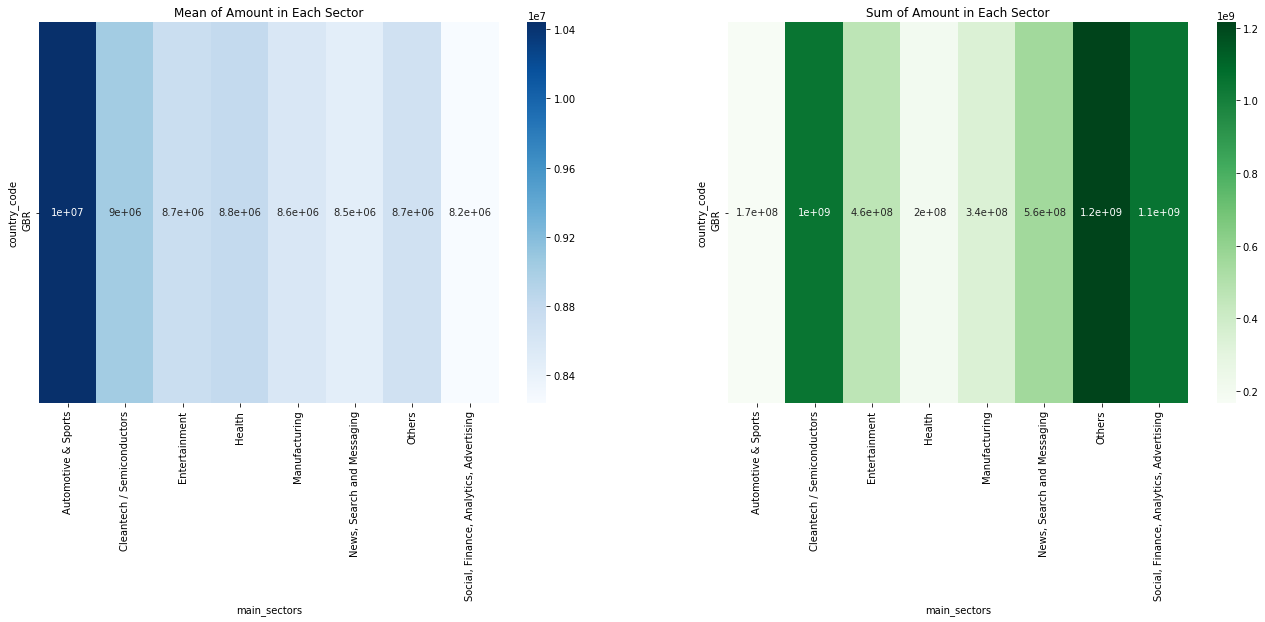

In [173]:
res1 = pd.pivot_table(data = D2, index = 'country_code', columns = 'main_sectors', values = 'raised_amount_usd', aggfunc = 'sum')
res2 = pd.pivot_table(data = D2, index = 'country_code', columns = 'main_sectors', values = 'raised_amount_usd', aggfunc = 'mean')


plt.subplots(figsize=(35,7))

plt.subplot(1,3,1)
sns.heatmap(res2,cmap = 'Blues', annot = True)
plt.title('Mean of Amount in Each Sector')

plt.subplot(1,3,2)
sns.heatmap(res1,cmap = 'Greens', annot = True)
plt.title('Sum of Amount in Each Sector')


plt.show()

#### Total Number of Sectors been invested

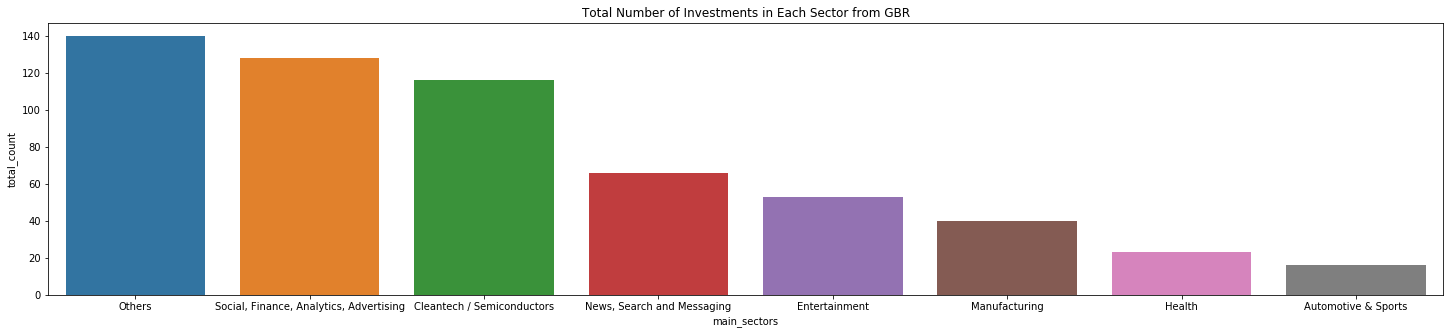

In [174]:
Total_number_investment = pd.DataFrame(D2.main_sectors.value_counts().reset_index(level = 0))

Total_number_investment = Total_number_investment.rename(columns={'index':'main_sectors', 'main_sectors':'total_count'})

plt.subplots(figsize = (25,5))
sns.barplot(Total_number_investment.main_sectors,Total_number_investment.total_count)
plt.title('Total Number of Investments in Each Sector from GBR')
plt.show()

#### Top 3 Main Sectors Invested in GBR 

In [175]:
Total_number_investment[0:3]

,main_sectors,total_count
0,Others,140
1,"Social, Finance, Analytics, Advertising",128
2,Cleantech / Semiconductors,116


#### Total Amount in Each Sector in GBR

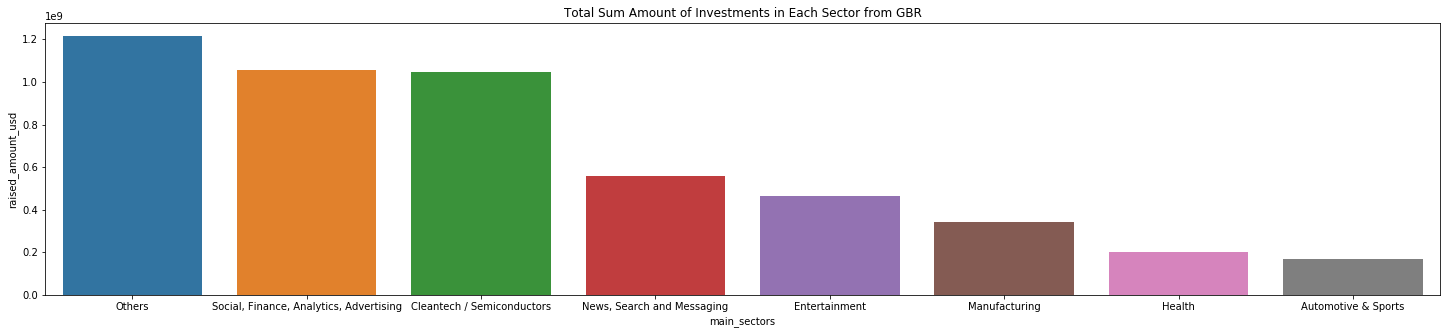

In [176]:
Total_Sum_Amount = pd.DataFrame(D2.groupby(['main_sectors'])['raised_amount_usd'].sum().sort_values(ascending = False).reset_index(level = 0))
plt.subplots(figsize = (25,5))
plt.title('Total Sum Amount of Investments in Each Sector from GBR')
sns.barplot(Total_Sum_Amount.main_sectors,Total_Sum_Amount.raised_amount_usd)
plt.show()


#### Top 3 Main Sectors 

In [177]:
Total_Sum_Amount[0:3]

,main_sectors,raised_amount_usd
0,Others,1.215442e+09
1,"Social, Finance, Analytics, Advertising",1.054628e+09
2,Cleantech / Semiconductors,1.048294e+09


#### Analysis on Top 3 Cities

C:\Users\Eeshwar\Anaconda3\envs\tensorflow-sessions\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


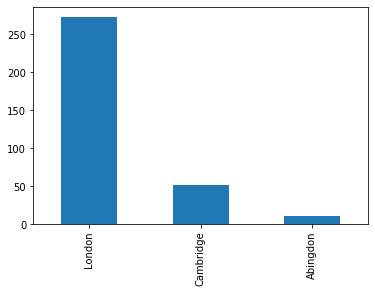

In [178]:
D2.city.value_counts()[0:3].plot('bar')

plt.show()

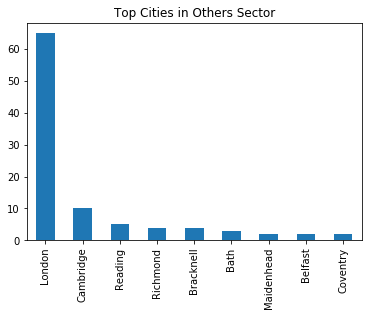

In [179]:
D2[(D2.main_sectors == 'Others')].city.value_counts()[0:9].plot(kind = 'bar')
plt.title('Top Cities in Others Sector')
plt.show()

In [180]:
D2.loc[(D2.main_sectors == 'Others') & (D2.city.isnull()),['city']] = 'London'

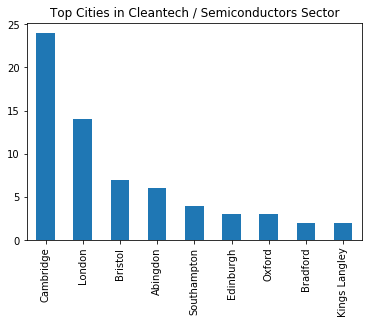

In [181]:
D2[(D2.main_sectors == 'Cleantech / Semiconductors')].city.value_counts()[0:9].plot(kind = 'bar')
plt.title('Top Cities in Cleantech / Semiconductors Sector')

plt.show()

In [182]:
D2.loc[(D2.main_sectors == 'Cleantech / Semiconductors') & (D2.city.isnull()),['city']] = 'Cambridge'

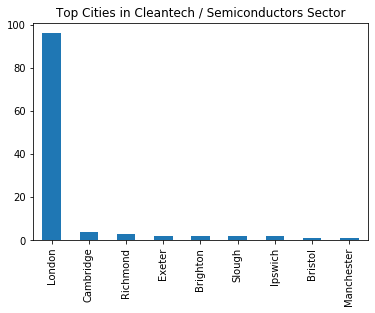

In [183]:
D2[(D2.main_sectors == 'Social, Finance, Analytics, Advertising')].city.value_counts()[0:9].plot(kind = 'bar')
plt.title('Top Cities in Cleantech / Semiconductors Sector')
plt.show()

In [184]:
D2.loc[(D2.main_sectors == 'Social, Finance, Analytics, Advertising') & (D2.city.isnull()),['city']] = 'London'

In [185]:
D2.city = D2.city.fillna('London')


#### Companies in GBR for Top 3 Sectors

##### Top Companies in Others Sectors

In [186]:
Top_Company = D2[(D2.main_sectors == 'Others')]
Top_Company.raised_amount_usd.sum()

1215442240.0

In [187]:
x = pd.DataFrame(Top_Company.groupby(['name'])['raised_amount_usd'].sum().sort_values(ascending = False)[0:9].reset_index(level=0))

x['raised_amount_usd %'] = 100 * (x.raised_amount_usd / (Top_Company.raised_amount_usd.sum()))

In [188]:
x

,name,raised_amount_usd,raised_amount_usd %
0,Electric Cloud,37000000.0,3.044159
1,SenSage,36250000.0,2.982454
2,SilverRail Technologies,29000000.0,2.385963
3,OpenCloud,27972766.0,2.301448
4,MyOptique Group,27694613.0,2.278563
5,Notonthehighstreet,26900000.0,2.213186
6,ACS Clothing,26239014.0,2.158804
7,Tribold,26000000.0,2.139139
8,ip.access,25000000.0,2.056865


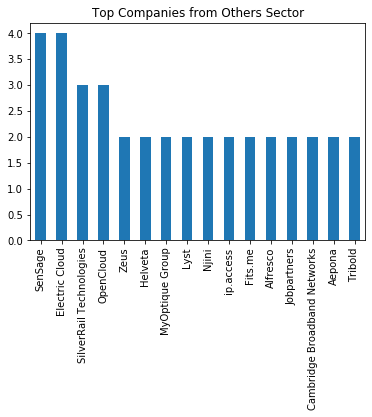

In [189]:
Top_Company.name.value_counts()[0:16].plot(kind ='bar' )
plt.title('Top Companies from Others Sector')
plt.show()

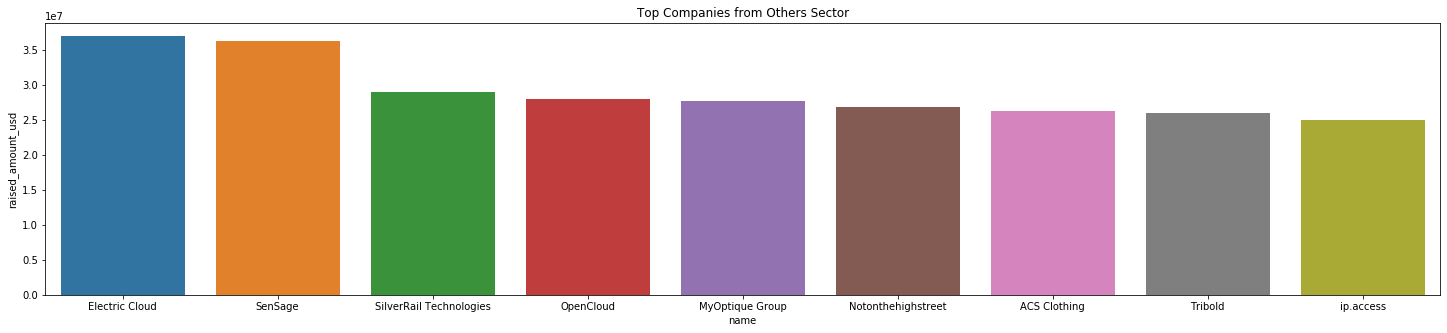

In [190]:
plt.subplots(figsize = (25,5))
sns.barplot(x.name,x.raised_amount_usd)
plt.title('Top Companies from Others Sector')
plt.show()

##### Top Companies in 'Social, Finance, Analytics, Advertising' Sectors

In [191]:
Top_Company = D2[(D2.main_sectors == 'Social, Finance, Analytics, Advertising')]
Top_Company.raised_amount_usd.sum()

1054628102.0

In [192]:
x = pd.DataFrame(Top_Company.groupby(['name'])['raised_amount_usd'].sum().sort_values(ascending = False)[0:9].reset_index(level=0))

x['raised_amount_usd %'] = 100 * (x.raised_amount_usd / (Top_Company.raised_amount_usd.sum()))

In [193]:
Top_Company = D2[(D2.main_sectors == 'Social, Finance, Analytics, Advertising')]
Top_Company.raised_amount_usd.sum()

1054628102.0

In [194]:
x = pd.DataFrame(Top_Company.groupby(['name'])['raised_amount_usd'].sum().sort_values(ascending = False)[0:9].reset_index(level=0))

x['raised_amount_usd %'] = 100 * (x.raised_amount_usd / (Top_Company.raised_amount_usd.sum()))

In [195]:
x

,name,raised_amount_usd,raised_amount_usd %
0,Celltick Technologies,37500000.0,3.555756
1,myThings,34000000.0,3.223885
2,Zopa,32900000.0,3.119583
3,VisualDNA,28550000.0,2.707115
4,MarketInvoice,25553007.0,2.422940
5,SumUp,24293649.0,2.303528
6,Amplience,24200000.0,2.294648
7,Garlik,22350000.0,2.119230
8,SportPursuit,22024487.0,2.088365


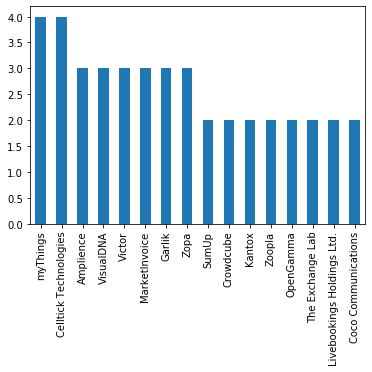

In [196]:
Top_Company.name.value_counts()[0:16].plot(kind ='bar' )
plt.show()

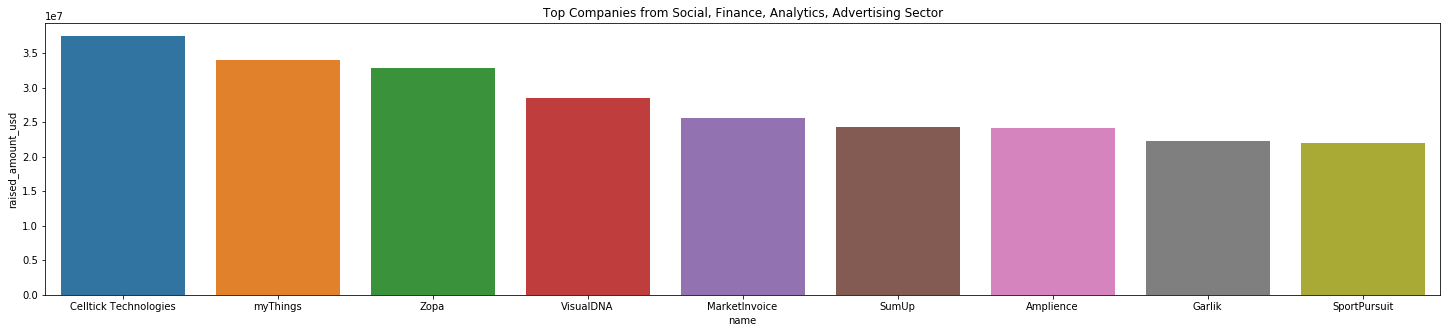

In [197]:
plt.subplots(figsize = (25,5))
sns.barplot(x.name,x.raised_amount_usd)
plt.title('Top Companies from Social, Finance, Analytics, Advertising Sector')
plt.show()

##### Top Companies in 'Cleantech / Semiconductors' Sectors

In [198]:
Top_Company = D2[(D2.main_sectors == 'Cleantech / Semiconductors' )]
Top_Company.raised_amount_usd.sum()

1048294307.0

In [199]:
x = pd.DataFrame(Top_Company.groupby(['name'])['raised_amount_usd'].sum().sort_values(ascending = False)[0:9].reset_index(level=0))

x['raised_amount_usd %'] = 100 * (x.raised_amount_usd / (Top_Company.raised_amount_usd.sum()))

In [200]:
x

,name,raised_amount_usd,raised_amount_usd %
0,EUSA Pharma,35600000.0,3.395993
1,Horizon Discovery,31353719.0,2.990927
2,F-star Biotechnology Limited,29132906.0,2.779077
3,Elixent,25000000.0,2.384826
4,Takeda Cambridge,22340000.0,2.131081
5,Immune Targeting Systems,20320961.0,1.938479
6,Plaxica,19940192.0,1.902156
7,i2O Water,19491529.0,1.859357
8,Xention,19051289.0,1.817361


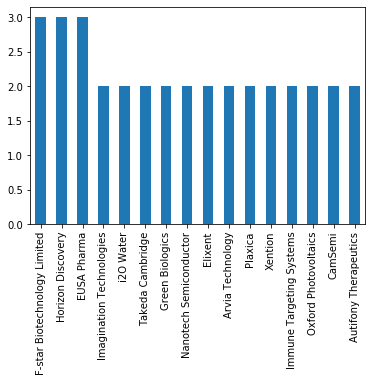

In [201]:
Top_Company.name.value_counts()[0:16].plot(kind ='bar' )
plt.show()

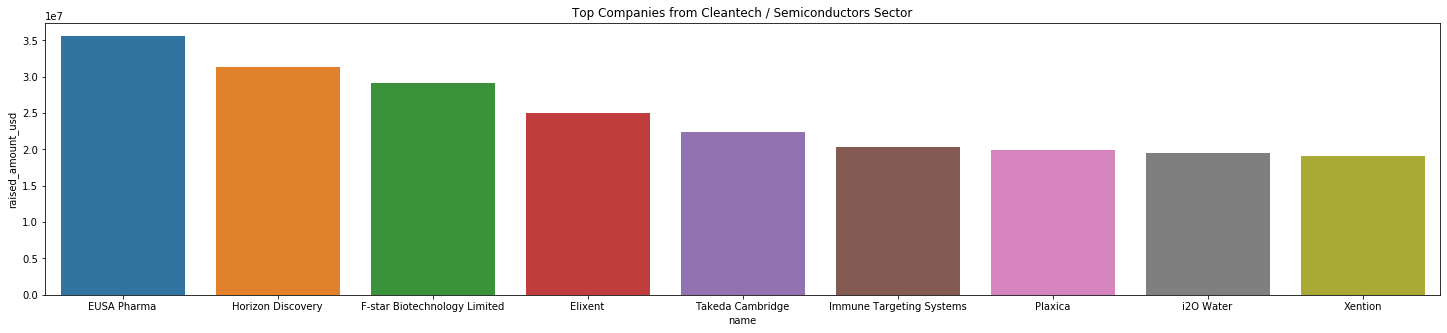

In [202]:
plt.subplots(figsize = (25,5))
sns.barplot(x.name,x.raised_amount_usd)
plt.title('Top Companies from Cleantech / Semiconductors Sector')
plt.show()

#### D3 Analysis

In [203]:
D3 = D3[(D3.raised_amount_usd <= 15000000) & (D3.raised_amount_usd >= 5000000)]


In [204]:
D3.shape

(387, 13)

In [205]:
Total_Amount = D3.raised_amount_usd.sum()
Total_Amount


3305755118.0

In [206]:
Total_Mean = D3.raised_amount_usd.mean()
Total_Mean


8542002.888888888

In [207]:
Total_Median = D3.raised_amount_usd.median()
Total_Median


8000000.0

In [208]:
Sum_Amount = pd.DataFrame(D3.groupby(['main_sectors'])['raised_amount_usd'].sum().sort_values(ascending = False).reset_index(level=0))
Mean_Amount = pd.DataFrame(D3.groupby(['main_sectors'])['raised_amount_usd'].mean().sort_values(ascending = False).reset_index(level=0))



In [209]:
Mean_Amount['raised_amount_usd %'] = round((Mean_Amount.raised_amount_usd / Total_Mean),2) 
Mean_Amount


,main_sectors,raised_amount_usd,raised_amount_usd %
0,"News, Search and Messaging",9.230025e+06,1.08
1,Cleantech / Semiconductors,9.034621e+06,1.06
2,Others,8.618262e+06,1.01
3,Health,8.342244e+06,0.98
4,"Social, Finance, Analytics, Advertising",8.312744e+06,0.97
5,Automotive & Sports,7.500000e+06,0.88
6,Manufacturing,7.421102e+06,0.87
7,Entertainment,7.098194e+06,0.83


#### Percentage of Raised Amount distributed Over Various Sectors

In [210]:
Sum_Amount['raised_amount_usd %'] = round(100*(Sum_Amount.raised_amount_usd / Total_Amount),2)
Sum_Amount


,main_sectors,raised_amount_usd,raised_amount_usd %
0,Cleantech / Semiconductors,894427439.0,27.06
1,Others,853207962.0,25.81
2,"Social, Finance, Analytics, Advertising",615143075.0,18.61
3,"News, Search and Messaging",406121113.0,12.29
4,Manufacturing,222633071.0,6.73
5,Health,150160390.0,4.54
6,Entertainment,149062068.0,4.51
7,Automotive & Sports,15000000.0,0.45


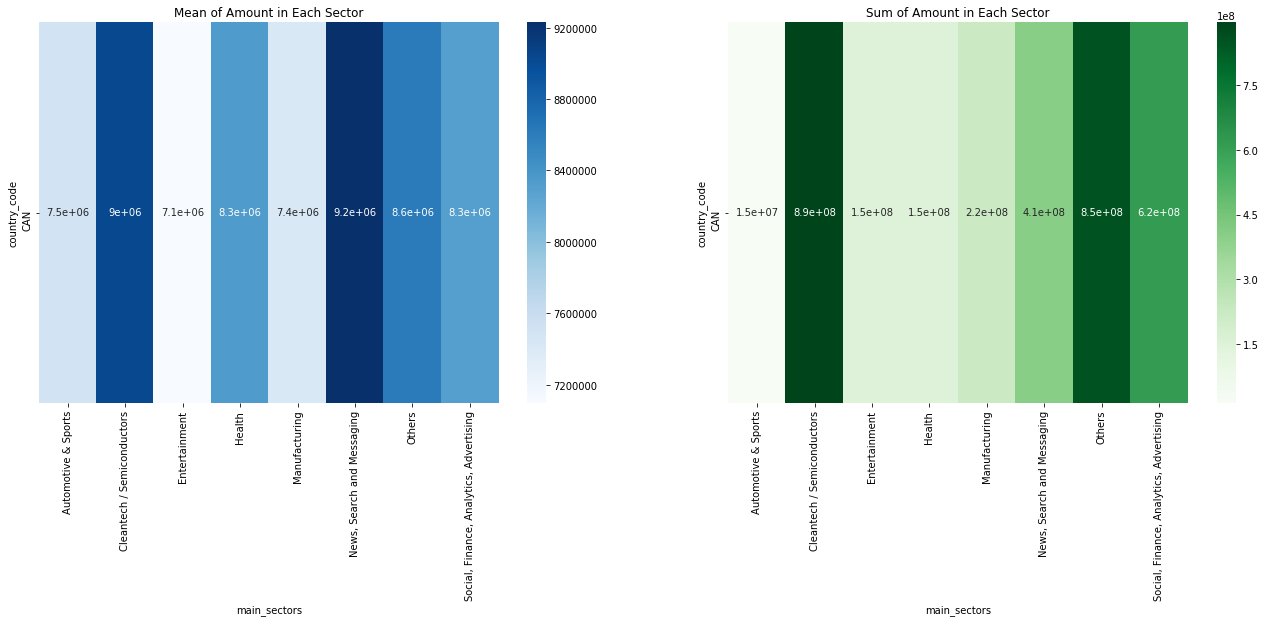

In [211]:
res1 = pd.pivot_table(data = D3, index = 'country_code', columns = 'main_sectors', values = 'raised_amount_usd', aggfunc = 'sum')
res2 = pd.pivot_table(data = D3, index = 'country_code', columns = 'main_sectors', values = 'raised_amount_usd', aggfunc = 'mean')

plt.subplots(figsize=(35,7))

plt.subplot(1,3,1)
sns.heatmap(res2,cmap = 'Blues', annot = True)
plt.title('Mean of Amount in Each Sector')

plt.subplot(1,3,2)
sns.heatmap(res1,cmap = 'Greens', annot = True)
plt.title('Sum of Amount in Each Sector')


plt.show()


#### Total Number of Sectors been invested

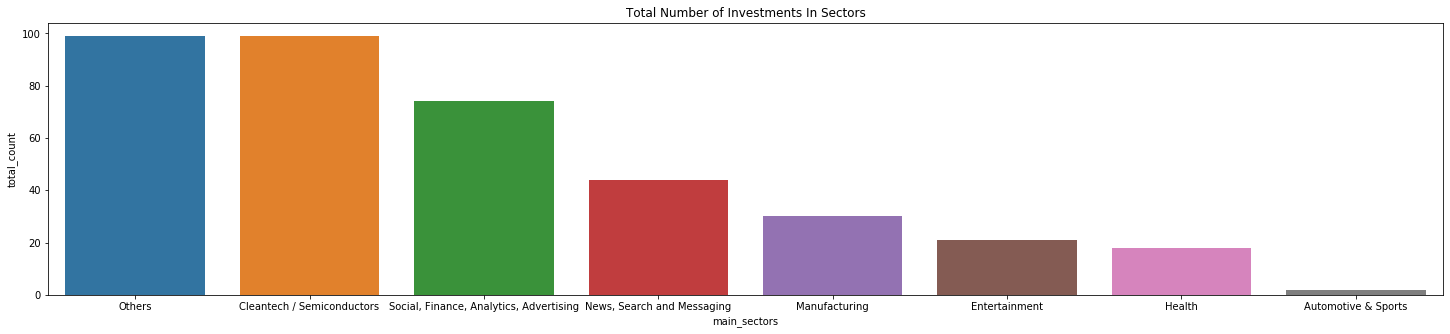

In [212]:
Total_number_investment = pd.DataFrame(D3.main_sectors.value_counts().reset_index(level = 0))

Total_number_investment = Total_number_investment.rename(columns={'index':'main_sectors', 'main_sectors':'total_count'})

plt.subplots(figsize = (25,5))
sns.barplot(Total_number_investment.main_sectors,Total_number_investment.total_count)
plt.title('Total Number of Investments In Sectors')
plt.show()


#### Top3 Main Sectors Invested in CAN

In [213]:
Total_number_investment[0:3]

,main_sectors,total_count
0,Others,99
1,Cleantech / Semiconductors,99
2,"Social, Finance, Analytics, Advertising",74


#### Total Amount in Each Sector in CAN

In [214]:
Total_Sum_Amount = pd.DataFrame(D3.groupby(['main_sectors'])['raised_amount_usd'].sum().sort_values(ascending = False).reset_index(level = 0))


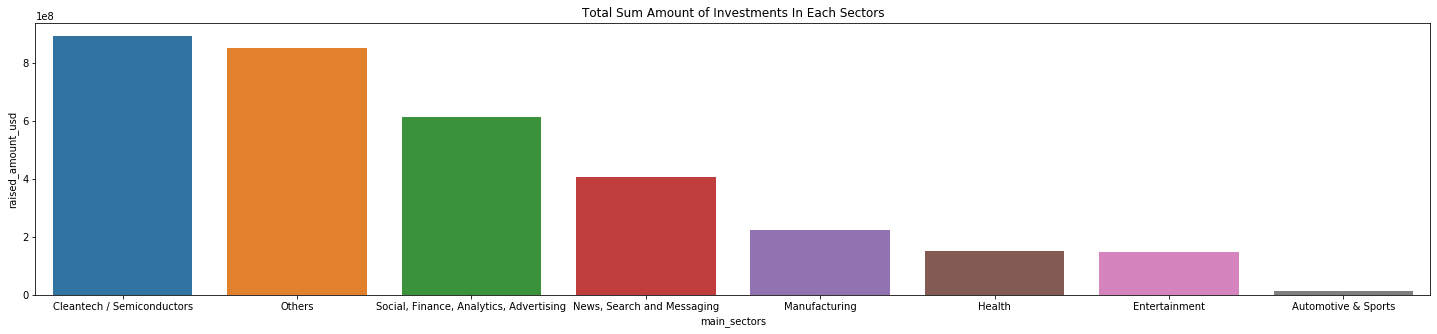

In [215]:
plt.subplots(figsize = (25,5))
sns.barplot(Total_Sum_Amount.main_sectors,Total_Sum_Amount.raised_amount_usd)
plt.title('Total Sum Amount of Investments In Each Sectors')
plt.show()


#### Total Amount Invested in Each Sector 

In [216]:
Total_Sum_Amount[0:3]

,main_sectors,raised_amount_usd
0,Cleantech / Semiconductors,894427439.0
1,Others,853207962.0
2,"Social, Finance, Analytics, Advertising",615143075.0


#### Top Companies in CAN for Top 3 Sectors

##### Top Companies in 'Cleantech / Semiconductors' Sectors

In [217]:
Top_Company = D3[(D3.main_sectors == 'Cleantech / Semiconductors')]
Top_Company.raised_amount_usd.sum()

894427439.0

In [218]:
x = pd.DataFrame(Top_Company.groupby(['name'])['raised_amount_usd'].sum().sort_values(ascending = False)[0:9].reset_index(level=0))

x['raised_amount_usd %'] = 100 * (x.raised_amount_usd / (Top_Company.raised_amount_usd.sum()))

In [219]:
x

,name,raised_amount_usd,raised_amount_usd %
0,Fresco Microchip,48000000.0,5.366562
1,Ostara,43152682.0,4.824615
2,Diablo Technologies,35500000.0,3.969020
3,Zymeworks,34100000.0,3.812495
4,enGene,31150000.0,3.482675
5,Nexterra,28462712.0,3.182227
6,ENBALA Power Networks,26581347.0,2.971884
7,Solantro Semiconductor,26000000.0,2.906888
8,Wavesat,22110000.0,2.471972


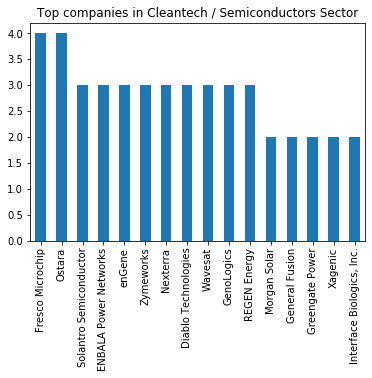

In [220]:
Top_Company.name.value_counts()[0:16].plot(kind ='bar' )
plt.title('Top companies in Cleantech / Semiconductors Sector' )
plt.show()

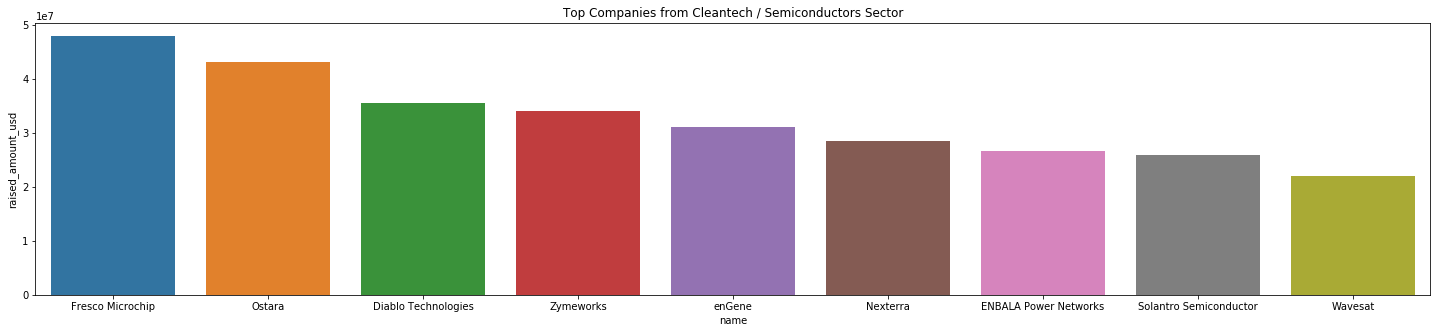

In [221]:
plt.subplots(figsize = (25,5))
sns.barplot(x.name,x.raised_amount_usd)
plt.title('Top Companies from Cleantech / Semiconductors Sector')
plt.show()

##### Top Companies in Others Sectors

In [222]:
Top_Company = D3[(D3.main_sectors == 'Others')]
Top_Company.raised_amount_usd.sum()

853207962.0

In [223]:
x = pd.DataFrame(Top_Company.groupby(['name'])['raised_amount_usd'].sum().sort_values(ascending = False)[0:9].reset_index(level=0))

x['raised_amount_usd %'] = 100 * (x.raised_amount_usd / (Top_Company.raised_amount_usd.sum()))

In [224]:
x

,name,raised_amount_usd,raised_amount_usd %
0,QuickPlay Media,38700000.0,4.535823
1,NewStep Networks,31477853.0,3.689353
2,Strangeloop Networks,21500000.0,2.519901
3,Morega Systems,20000000.0,2.344094
4,LxDATA,19310000.0,2.263223
5,Natural Convergence,19114247.0,2.240280
6,Klocwork,19100000.0,2.238610
7,Fusepoint Managed Services,19000000.0,2.226890
8,Teradici,18751087.0,2.197716


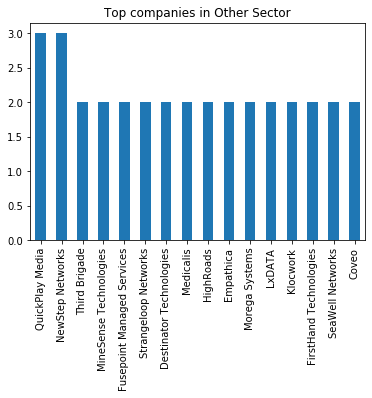

In [225]:
Top_Company.name.value_counts()[0:16].plot(kind ='bar' )
plt.title('Top companies in Other Sector' )

plt.show()

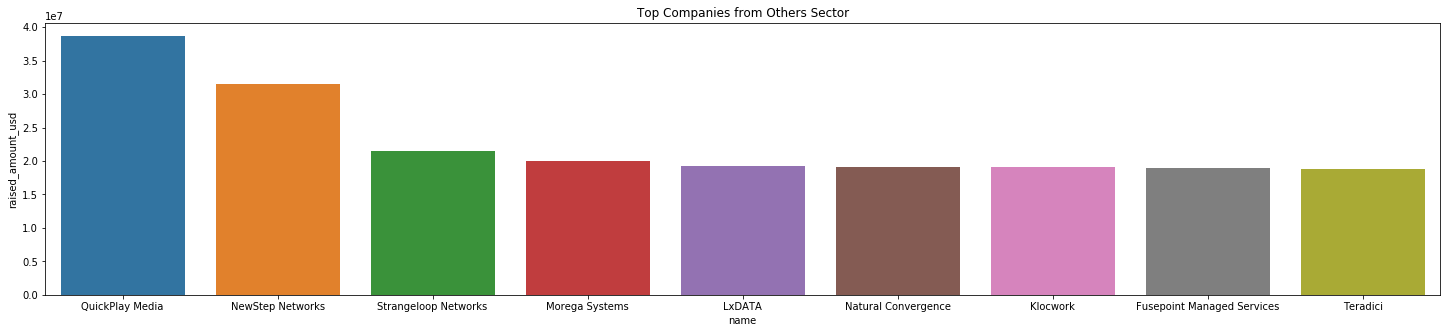

In [226]:
plt.subplots(figsize = (25,5))
sns.barplot(x.name,x.raised_amount_usd)
plt.title('Top Companies from Others Sector')
plt.show()

##### Top Companies in 'Social, Finance, Analytics, Advertising' Sectors

In [227]:
Top_Company = D3[(D3.main_sectors == 'Social, Finance, Analytics, Advertising')]
Top_Company.raised_amount_usd.sum()

615143075.0

In [228]:
x = pd.DataFrame(Top_Company.groupby(['name'])['raised_amount_usd'].sum().sort_values(ascending = False)[0:9].reset_index(level=0))

x['raised_amount_usd %'] = 100 * (x.raised_amount_usd / (Top_Company.raised_amount_usd.sum()))

In [229]:
x

,name,raised_amount_usd,raised_amount_usd %
0,Wave Accounting,33000000.0,5.364606
1,Shopify,22000000.0,3.576404
2,Visier,21000000.0,3.413840
3,ScribbleLive,20000000.0,3.251276
4,eSentire,19639999.0,3.192753
5,Leonardo Worldwide Corporation,18970000.0,3.083835
6,Infobright,18000000.0,2.926149
7,Cieslok Media,15000000.0,2.438457
8,Zafin,15000000.0,2.438457


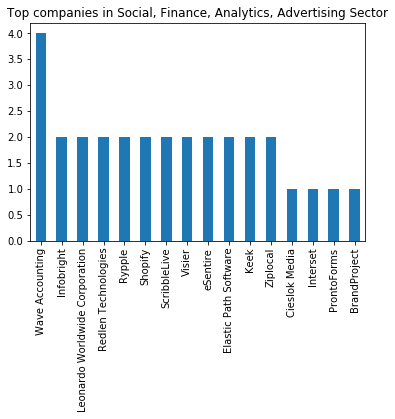

In [230]:
Top_Company.name.value_counts()[0:16].plot(kind ='bar' )
plt.title('Top companies in Social, Finance, Analytics, Advertising Sector' )
plt.show()

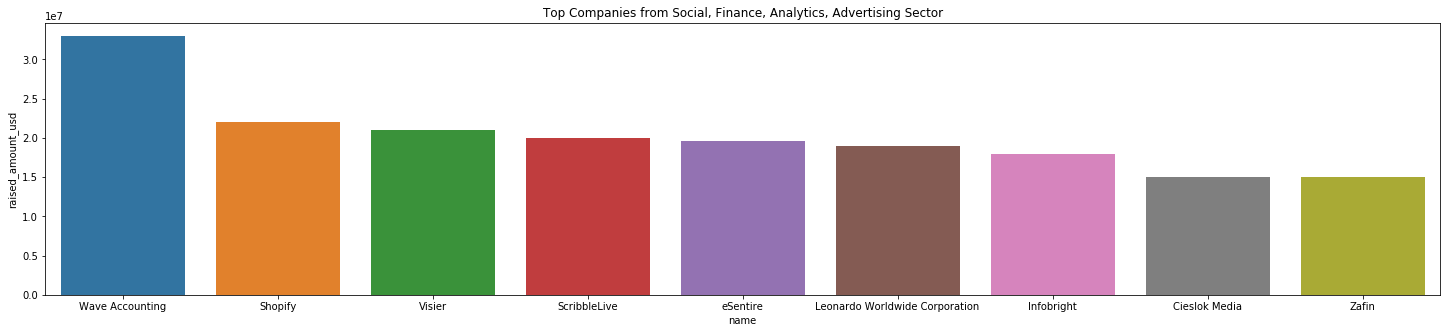

In [231]:
plt.subplots(figsize = (25,5))
sns.barplot(x.name,x.raised_amount_usd)
plt.title('Top Companies from Social, Finance, Analytics, Advertising Sector')
plt.show()

#### Analyze All the three countries 

In [232]:
top3 = top9[top9.country_code.isin(['USA','GBR','CAN'])]
ugc1 = pd.pivot_table(data = top3, index = 'country_code', columns = 'main_sectors', values = 'raised_amount_usd', aggfunc = 'sum')
ugc2 = pd.pivot_table(data = top3, index = 'country_code', columns = 'main_sectors', values = 'raised_amount_usd', aggfunc = 'mean')


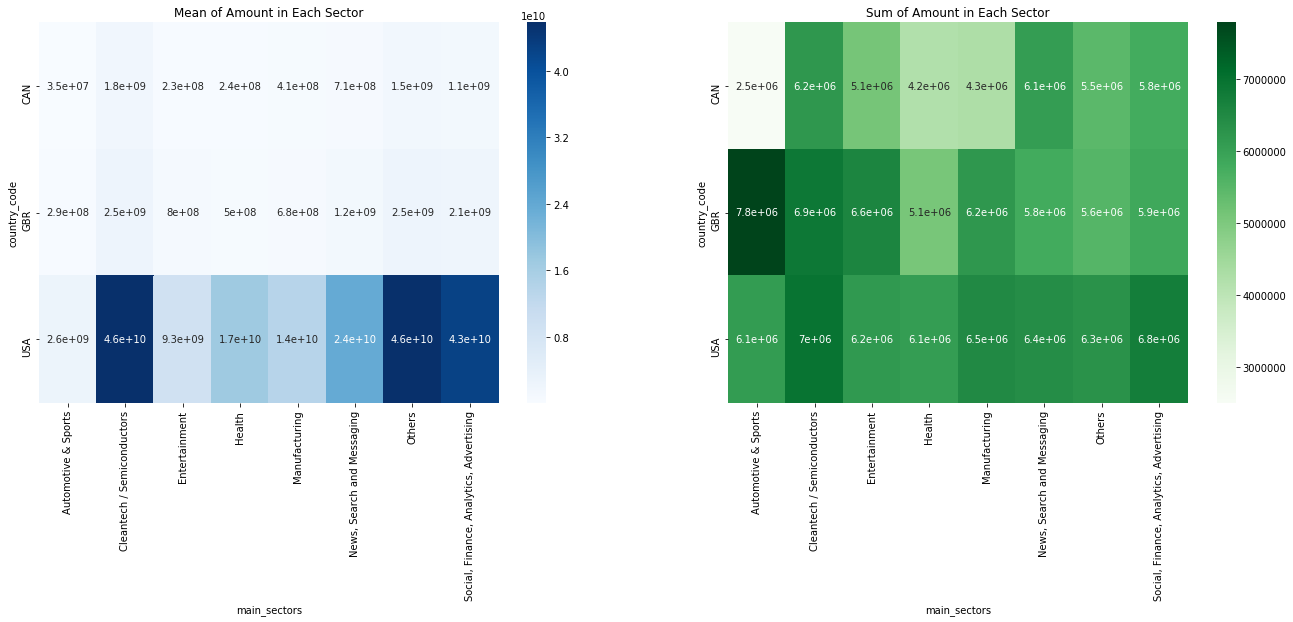

In [233]:
plt.subplots(figsize=(35,7))

plt.subplot(1,3,1)
sns.heatmap(ugc1,cmap = 'Blues', annot = True)
plt.title('Mean of Amount in Each Sector')

plt.subplot(1,3,2)
sns.heatmap(ugc2,cmap = 'Greens', annot = True)
plt.title('Sum of Amount in Each Sector')


plt.show()

In [234]:
Top3_Analysis = D1[D1.main_sectors.isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]

In [235]:
Top3_Analysis.shape

(7540, 13)

In [236]:
Top3_Analysis = Top3_Analysis.append(D2[D2.main_sectors.isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])], ignore_index = True)

In [237]:
Top3_Analysis.shape

(7924, 13)

In [238]:
Top3_Analysis = Top3_Analysis.append(D3[D3.main_sectors.isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])], ignore_index = True)

In [239]:
Top3_Analysis.shape

(8196, 13)

In [240]:
sample =  D1
sample = sample.append(D2,ignore_index = True)
sample = sample.append(D3,ignore_index = True)

In [241]:
sample1 = D1[(D1.main_sectors.isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])) & (D1.name.isin(['Virtustream','Capella Photonics','AirTight Networks','Biodesix','SST Inc. (Formerly ShotSpotter)','Demandbase','Intacct','Tigo Energy','ForSight Labs']))]
sample1 = sample1.append(D2[(D2.main_sectors.isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])) & (D2.name.isin(['Electric Cloud','SenSage','SilverRail Technologies','Celltick Technologies','myThings','Zopa','EUSA Pharma','Horizon Discovery','F-star Biotechnology Limited']))],ignore_index = True)
sample1 = sample1.append(D3[(D3.main_sectors.isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])) & (D3.name.isin(['Fresco Microchip','Ostara','Diablo Technologies','QuickPlay Media','NewStep Networks','Strangeloop Networks','Wave Accounting','Shopify','Visier']))],ignore_index = True)





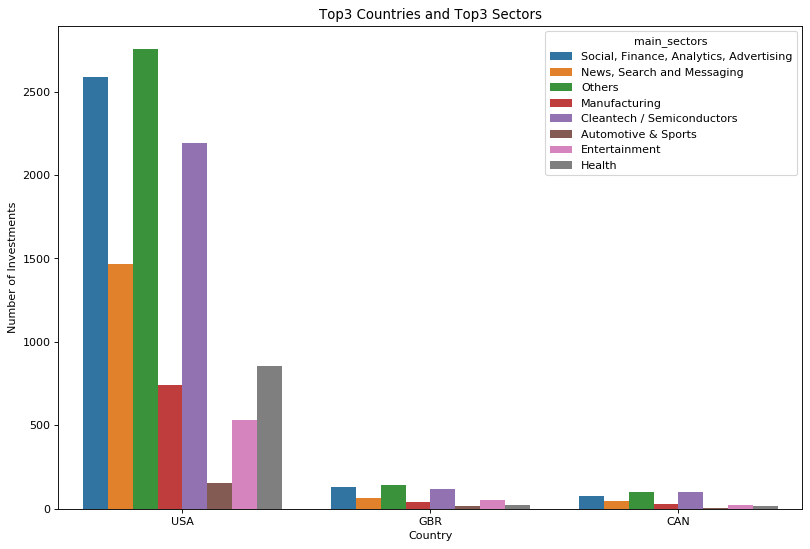

In [242]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

top3_plt1 = sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sectors", data = sample ,estimator=lambda x: len(x))
top3_plt1.set(xlabel='Country', ylabel='Number of Investments')
plt.title('Top3 Countries and Top3 Sectors')
plt.show()

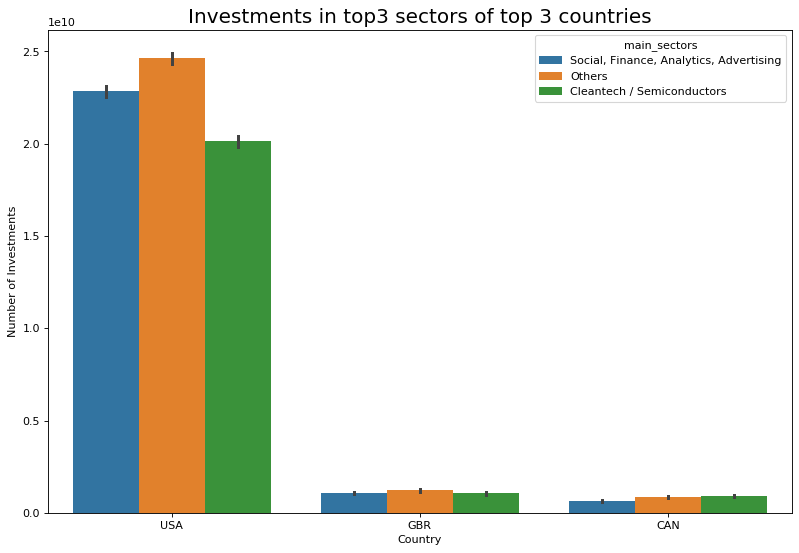

In [243]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

top3_plt2 = sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sectors", data = Top3_Analysis ,estimator = np.sum)
top3_plt2.set(xlabel='Country', ylabel='Number of Investments')
top3_plt2.set_title('Investments in top3 sectors of top 3 countries',fontsize =18)
plt.show()

<Figure size 800x640 with 0 Axes>

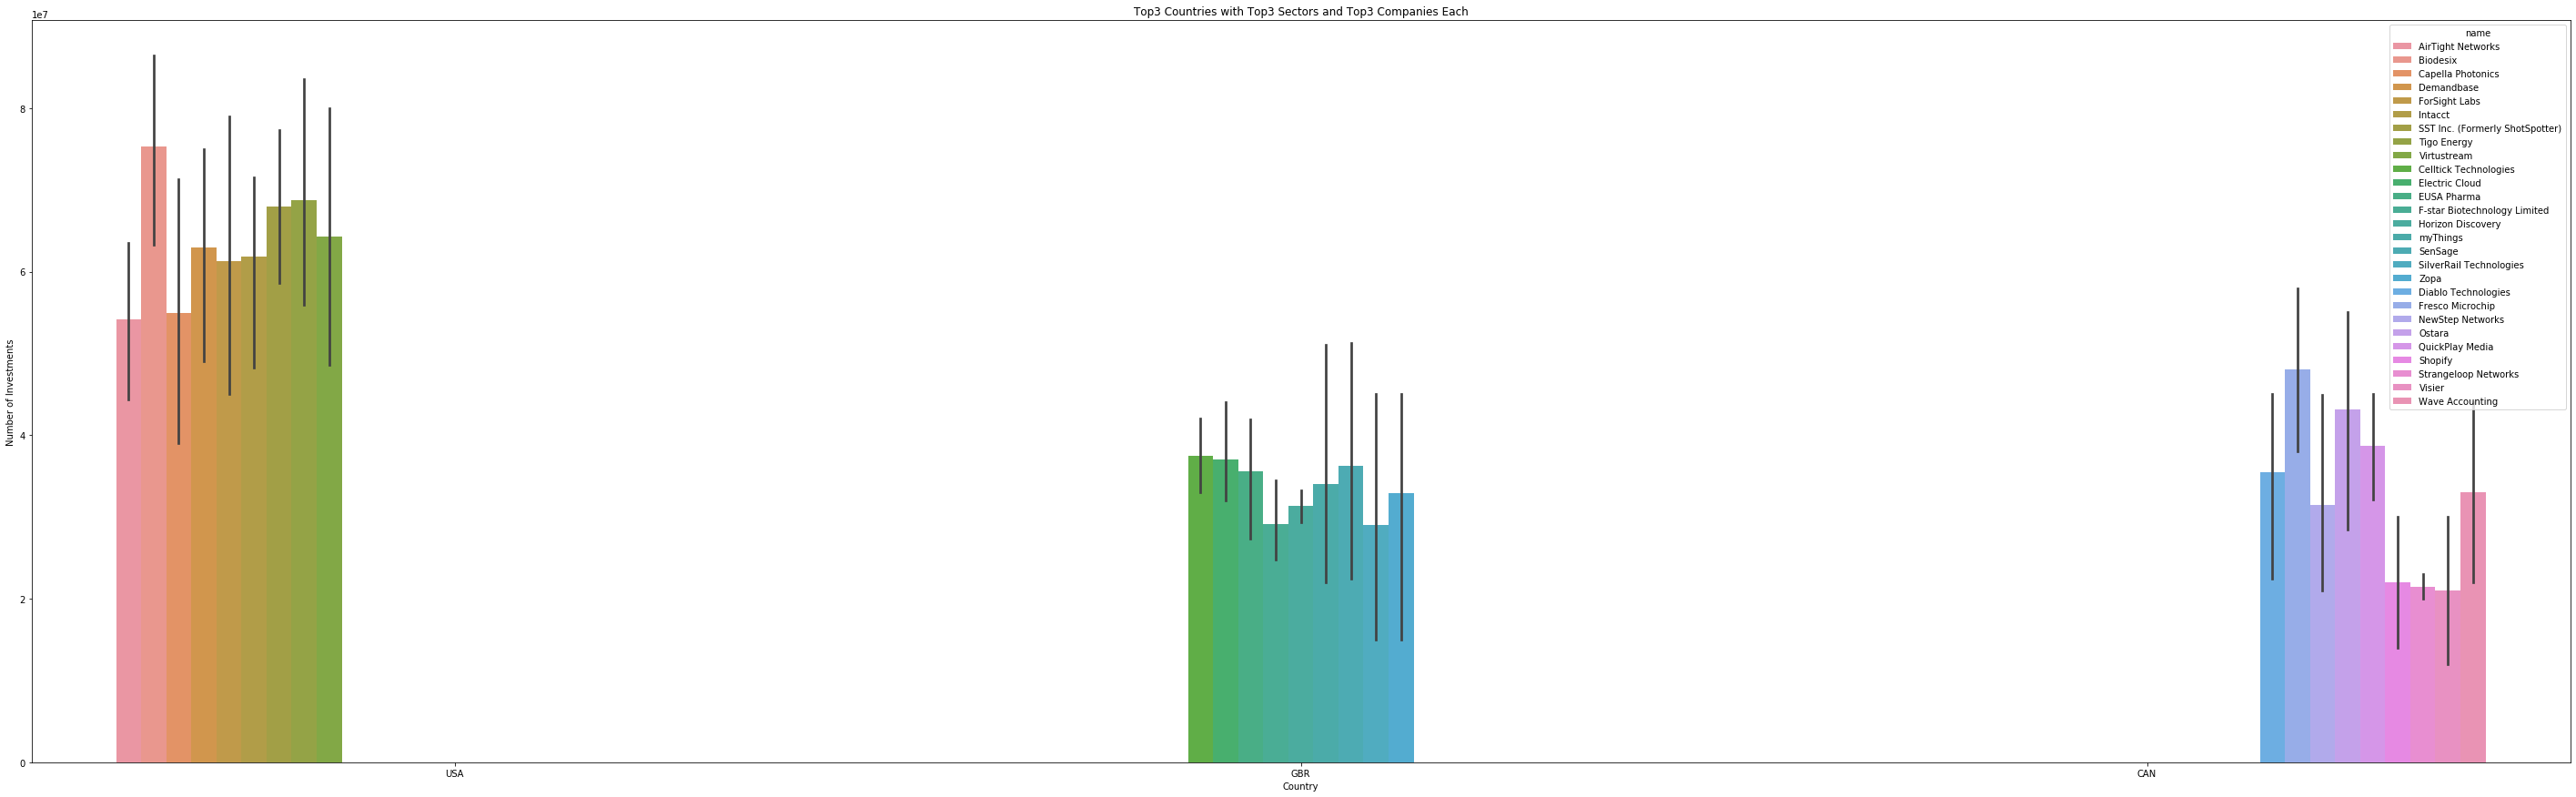

In [244]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.subplots(figsize = (50,15))
top3_plt = sns.barplot(x="country_code", y='raised_amount_usd', hue='name', data = sample1 ,estimator = np.sum)
top3_plt.set(xlabel='Country', ylabel='Number of Investments')
top3_plt.set_title('Investments in top3 sectors of top 3 countries top 3 Companies',fontsize =11)
plt.title('Top3 Countries with Top3 Sectors and Top3 Companies Each')
plt.show()